In [10]:
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_params as glm_params
import pandas as pd
from multiprocessing import Pool
import numpy as np
from visual_behavior.data_access import loading, utilities, from_lims
import os
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from visual_behavior_glm.glm import GLM
import seaborn as sns

import visual_behavior.utilities as vbu

In [58]:
%matplotlib notebook

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
version = '16_events_all_L2_optimize_by_session'

In [3]:
results_summary = gat.retrieve_results({'glm_version': '16_events_all_L2_optimize_by_session'}, results_type='summary')

In [16]:
results = gat.retrieve_results({'glm_version': '16_events_all_L2_optimize_by_session'}, results_type='full')

In [5]:
results_pivoted = gat.build_pivoted_results_summary('adj_fraction_change_from_full',results_summary=results_summary)

In [11]:
run_params = glm_params.load_run_json(version)

In [14]:
weights_df = gat.build_weights_df(run_params,results_pivoted)

100%|██████████| 1079/1079 [02:34<00:00,  6.99it/s]


In [18]:
dropout_summary_pivoted = gat.build_pivoted_results_summary(results_summary=results_summary, cutoff=0.01, value_to_use='adj_fraction_change_from_full')

In [20]:
all_dropouts = np.sort([dropout for dropout in results_summary['dropout'].unique() if not dropout.startswith('single')])

def get_dominant_dropout(row, cols_to_check):
    return row[cols_to_check].astype(float).idxmin()

cols_to_check = [col for col in all_dropouts if not col.startswith('image') and col!='visual']
dropout_summary_pivoted['dominant_dropout'] = dropout_summary_pivoted.apply(get_dominant_dropout, axis=1, args=[cols_to_check])

In [26]:
dropout_summary_pivoted['dominant_dropout'].value_counts()

all-images               15791
behavioral                2295
expectation                977
running_and_omissions      321
pupil_and_omissions        311
cognitive                  256
pupil_and_running          136
misses                     105
hits                        86
licking                     18
correct_rejects             18
task                        18
false_alarms                13
running                     11
time                         9
pupil                        8
intercept                    5
face_motion_PC_0             5
model_bias                   3
model_timing1D               3
face_motion_energy           3
model_omissions1             2
face_motion_PC_1             2
model_task0                  2
beh_model                    2
face_motion_PC_3             1
Name: dominant_dropout, dtype: int64

In [34]:
lick_session = dropout_summary_pivoted.query('dominant_dropout == "licking"').sample(random_state=0).iloc[0]
lick_session

identifier                 1005299957_1086555190
Full                                           0
all-images                             -0.935061
beh_model                                      0
behavioral                             -0.142877
                                   ...          
session_tags                                 NaN
failure_tags                        d_prime_peak
model_outputs_available                     True
location                            Vip_VISp_175
dominant_dropout                         licking
Name: 81, Length: 119, dtype: object

In [39]:
models = {}
models['licking'] = GLM(
    ophys_experiment_id = lick_session['identifier'].split('_')[0],
    version = version, 
    log_results=False, 
    log_weights=False,
    use_previous_fit=True,
    NO_DROPOUTS=True,
)

importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_all_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2020-02-05 21:28:24+00:00) for behavior session (1005261321) deviates by more than an hour from the `start_time` (2020-02-05 13:48:10.256000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod3/specimen_967938399/behavior_session_1005261321/1005249212.pkl
  warnings.warn(


    Adding kernel: false_alarms
	Error encountered while adding kernel for false_alarms. Attemping to continue without this kernel.
	Less than minimum number of events: 2 false_alarm
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running
                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_all_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py:795: RuntimeWarning: invalid value encountered in greater
  d_mask = np.abs(np.diff(x,append=x[-1])) > run_params['eye_transient_threshold']
/home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:702: Runtime

                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
could not load PC activations for ophys_session_id 1005249212
list index out of range
could not load PC activations for ophys_session_id 1005249212
list index out of range
	Error encountered while adding kernel for face_motion_PC_0. Attemping to continue without this kernel. 
list indices must be integers or slices, not tuple
    Adding kernel: face_motion_PC_1
could not load PC activations for ophys_session_id 1005249212
list index out of range
could not load PC activations for ophys_session_id 1005249212
list index out of range
	Error encountered while adding kernel for face_motion_PC_1. Attemping to continue without this kernel. 
list indices must be integers or slices, not tuple
    Adding kernel: face_motion_PC_2
could not load PC activations for ophys_session_id 1005249212
list index out of range
could not load PC activations for ophys_session_id 1005249212
list 

In [68]:
image_session = dropout_summary_pivoted.query('dominant_dropout == "all-images"').sample(random_state=0).iloc[0]
image_session

identifier                 993344852_1086619880
Full                                          0
all-images                            -0.751766
beh_model                                     0
behavioral                           -0.0272462
                                   ...         
session_tags                                NaN
failure_tags                       d_prime_peak
model_outputs_available                    True
location                       Slc17a7_VISp_175
dominant_dropout                     all-images
Name: 18941, Length: 119, dtype: object

In [409]:
image_session['identifier']

'993344852_1086619880'

In [40]:
models['visual'] = GLM(
    ophys_experiment_id = image_session['identifier'].split('_')[0],
    version = version, 
    log_results=False, 
    log_weights=False,
    use_previous_fit=True,
    NO_DROPOUTS=True,
)

importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_all_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-12-09 16:38:51+00:00) for behavior session (993242859) deviates by more than an hour from the `start_time` (2019-12-09 09:04:18.208000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod4/specimen_962177507/behavior_session_993242859/993230746.pkl
  warnings.warn(


    Adding kernel: false_alarms
	Error encountered while adding kernel for false_alarms. Attemping to continue without this kernel.
	Less than minimum number of events: 0 false_alarm
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running
                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
could not load PC activations for ophys_session_id 993230746
list index out of range
could not load PC activations for ophys_session_id 993230746
list index out of range
	Error encountered while adding kernel for face_motion_PC_0. Attemping to continue without this kernel. 
list indices must be integers or slices, not tuple
    Adding kernel: face_motion_PC_1
could not load PC activations for ophys_session_id 993230746
list index out of range
could not load PC activations for ophys_session_id 993230746
list index out of range
	Error encountered while adding kernel for face_motion_PC_1. Attemping to continue without this kernel. 
list indices must be integers or slices, not tuple
    Adding kernel: face_motion_PC_2
could not load PC activations for ophys_session_id 993230746
list index out of range
could not load PC activations for ophys_session_id 993230746
list index 

In [87]:
models['visual_meso'] = GLM(
    ophys_experiment_id = 906910627,
    version = version, 
    log_results=False, 
    log_weights=False,
    use_previous_fit=True,
    NO_DROPOUTS=True,
)

importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_all_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-07-15 11:15:20.640855+00:00) for behavior session (906658064) deviates by more than an hour from the `start_time` (2019-07-15 12:18:06.720000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod0/specimen_843122504/behavior_session_906658064/906521029.pkl
  warnings.warn(


    Adding kernel: false_alarms
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:363: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(


                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
 

In [38]:
def get_kernel_weights(glm, kernel_name, cell_specimen_id):
    kernel_list = list(glm.design.kernel_dict.keys())
    all_weight_names = glm.X.weights.values

    t = np.linspace(
        0,
        glm.design.kernel_dict[kernel_name]['kernel_length_samples']/glm.fit['ophys_frame_rate'],
        glm.design.kernel_dict[kernel_name]['kernel_length_samples']
    )
    t += glm.design.kernel_dict[kernel_name]['offset_seconds']
    kernel_weight_names = [w for w in all_weight_names if w.startswith(kernel_name)]
    w_kernel = glm.W.loc[dict(weights=kernel_weight_names, cell_specimen_id=cell_specimen_id)]
    
    return t, w_kernel

# Licking model

In [100]:
csid_licking = 1086555190
models['licking'].cell_results_df

index  fit_trace_timestamps  cell_specimen_id  fit_array       dff  \
0              0             306.76845        1086556416        0.0 -0.021123   
1              1             306.76845        1086557477        0.0 -0.065747   
2              2             306.76845        1086560048        0.0  0.052172   
3              3             306.76845        1086559782        0.0  0.062054   
4              4             306.76845        1086564137        0.0  0.096960   
...          ...                   ...               ...        ...       ...   
3789975  3789975            3909.69060        1086565528        0.0 -0.095009   
3789976  3789976            3909.69060        1086569336        0.0  0.059720   
3789977  3789977            3909.69060        1086562780        0.0 -0.149204   
3789978  3789978            3909.69060        1086561466        0.0 -0.128166   
3789979  3789979            3909.69060        1086563601        0.0 -0.038699   

         events  model_prediction  frame_index  
0           0.0      3.194984e-03         9407  
1           0.0      1.245446e-02         9407  
2           0.0      6.152831e-03         9407  
3           0.0      1.166154e-02         9407  
4           0.0      4.260434e-04         9407  
...         ...               ...          ...  
3789975     0.0     -5.392226e-05       120876  
3789976     0.0     -2.494048e-04       120876  
3789977     0.0     -1.498395e-03       120876  
3789978     0.0      2.947540e-07       120876  
3789979     0.0     -7.095366e-04       120876  

[3789980 rows x 8 columns]

In [98]:
models['licking'].results.loc[1086555190]['Full__avg_cv_var_test']

0.014976294941829855

<IPython.core.display.Javascript object>


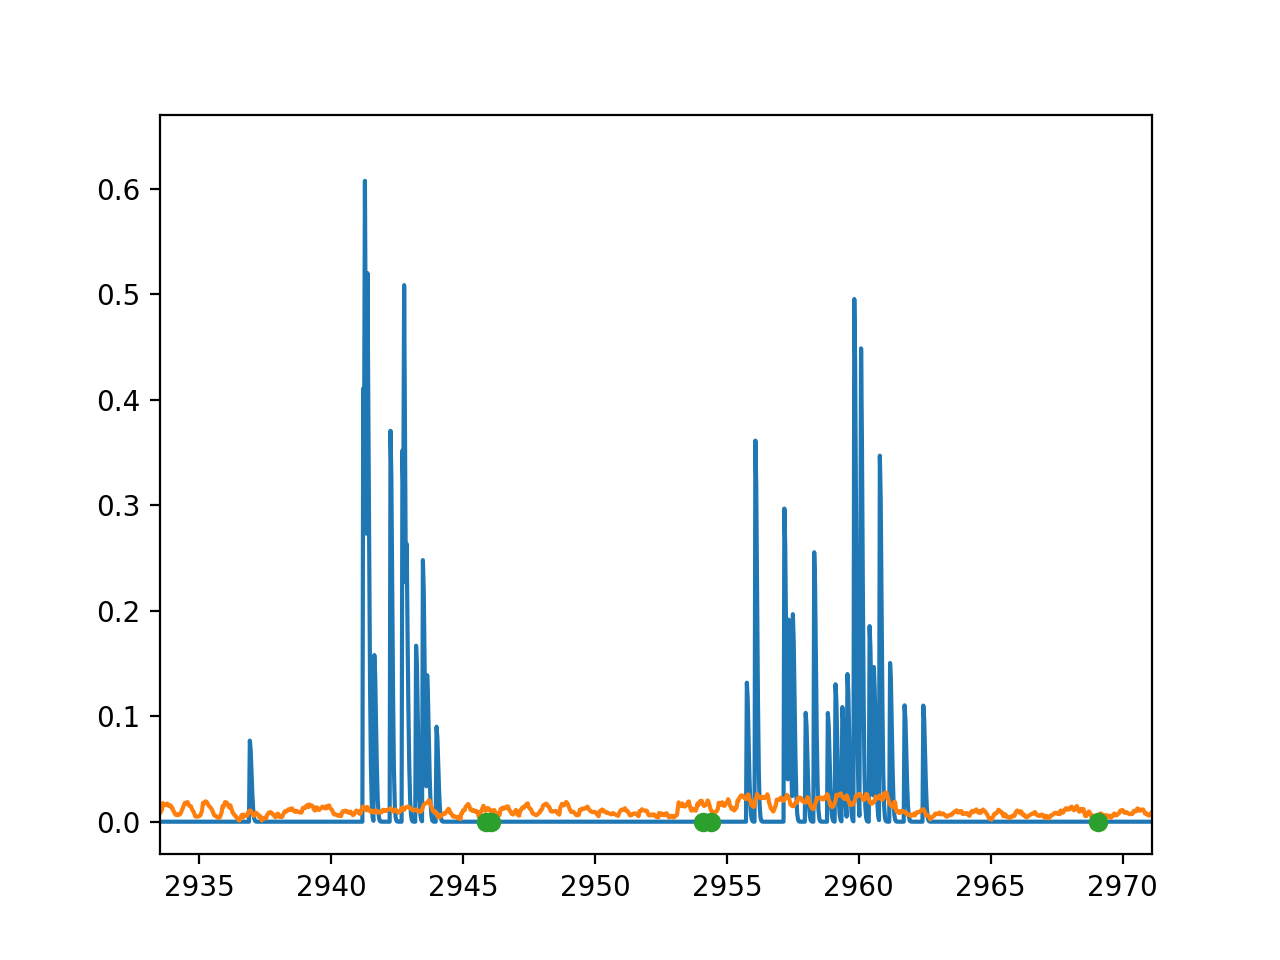

In [101]:
fig, ax = plt.subplots()
ax.plot(
    models['licking'].cell_results_df.query('cell_specimen_id == @csid_licking')['fit_trace_timestamps'],
    models['licking'].cell_results_df.query('cell_specimen_id == @csid_licking')['fit_array']
)
ax.plot(
    models['licking'].cell_results_df.query('cell_specimen_id == @csid_licking')['fit_trace_timestamps'],
    models['licking'].cell_results_df.query('cell_specimen_id == @csid_licking')['model_prediction']
)
ax.plot(
    models['licking'].session.licks['timestamps'],
    np.zeros_like(models['licking'].session.licks['timestamps']),
    marker = 'o',
    linestyle = 'none'
)

In [ ]:
models['licking'].plot_filters(csid_licking)

# scientifica visual model,

<IPython.core.display.Javascript object>


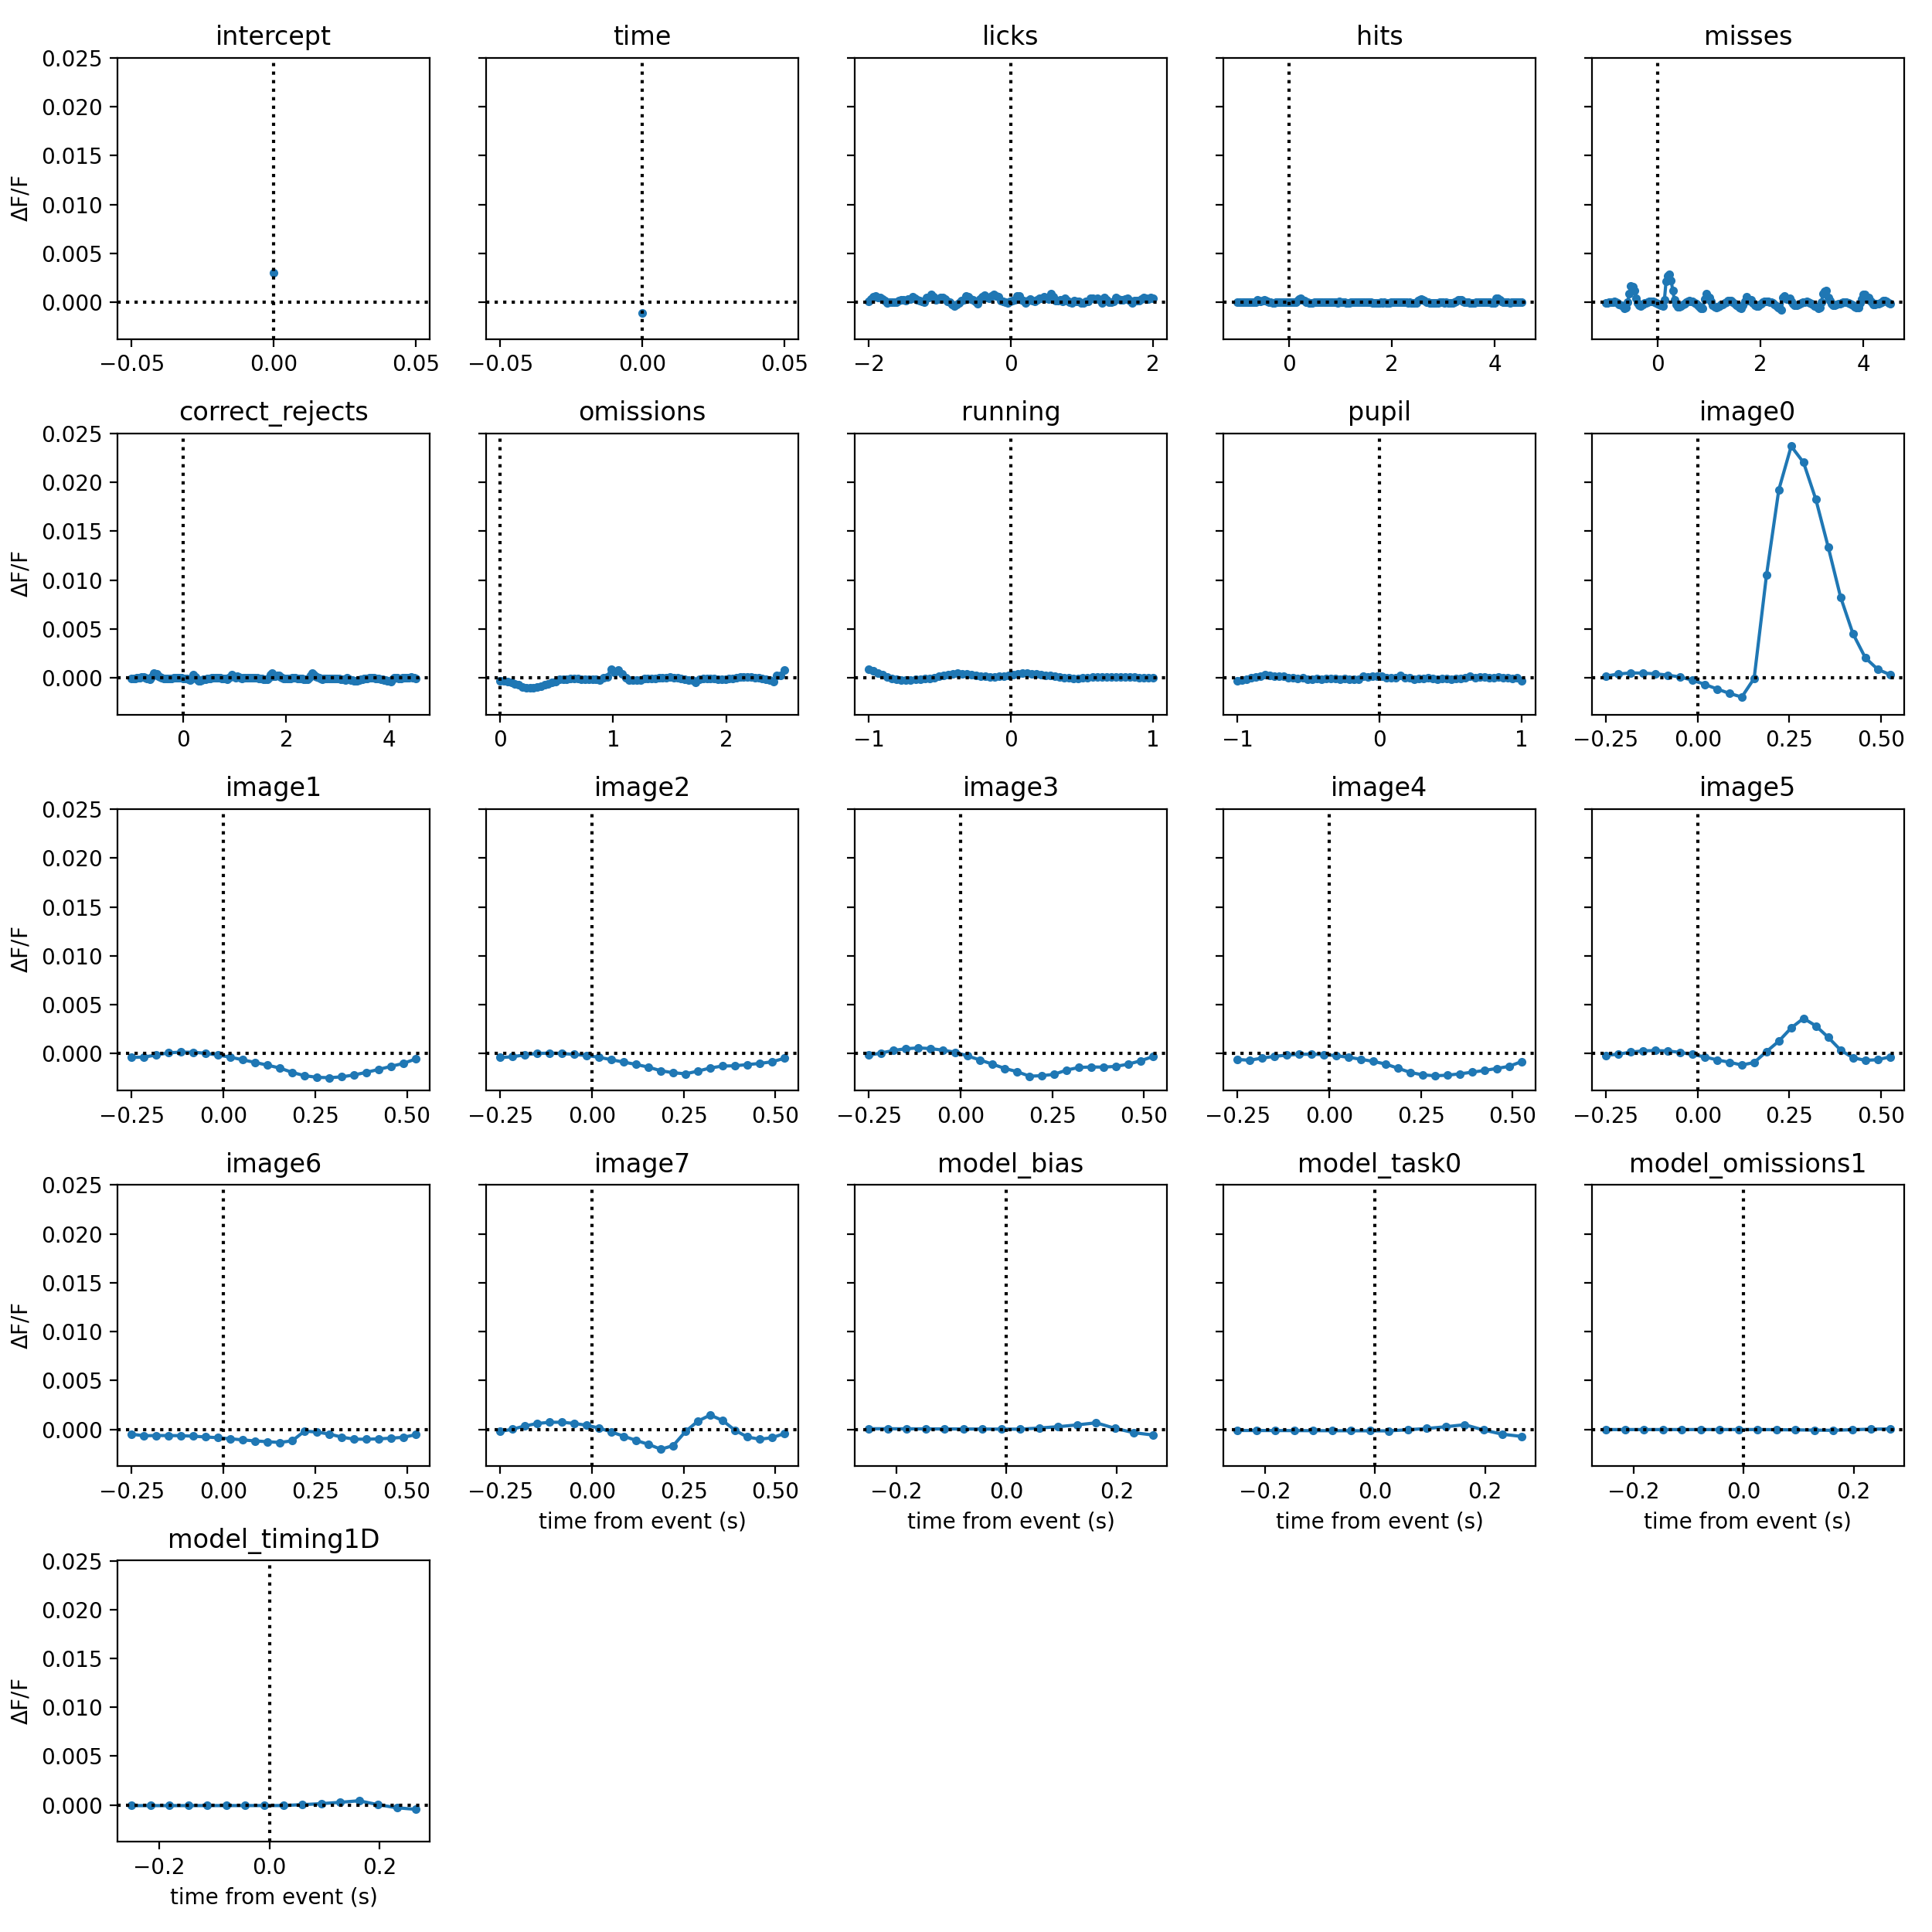

In [94]:
csid_visual = 1086619880
models['visual'].plot_filters(csid_visual)

<IPython.core.display.Javascript object>


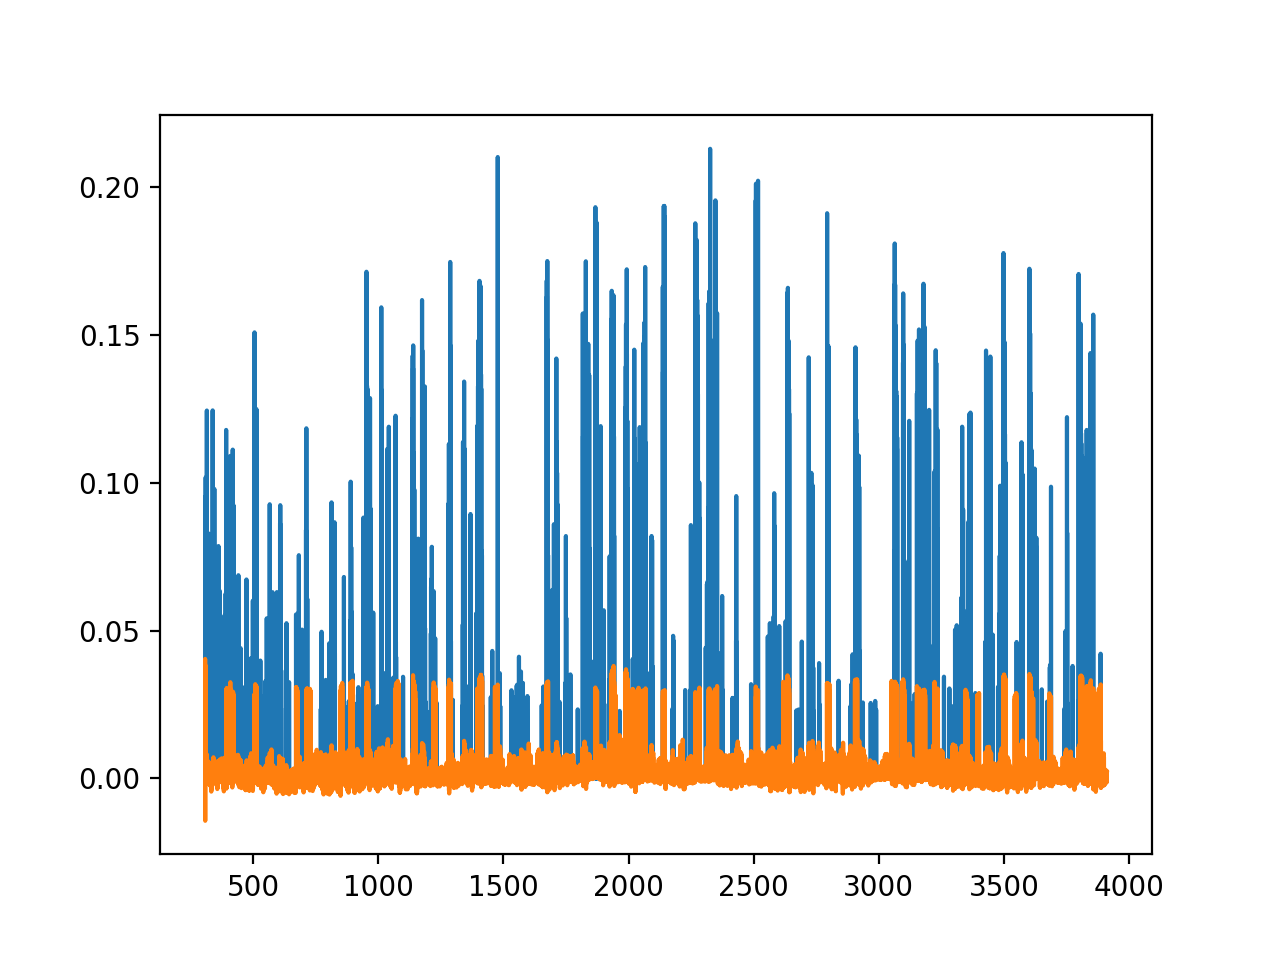

In [95]:
fig, ax = plt.subplots()
ax.plot(
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_array']
)
ax.plot(
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['model_prediction']
)

In [76]:
models['visual'].cell_results_df

index  fit_trace_timestamps  cell_specimen_id  fit_array  \
0                0             307.51238        1086637683        0.0   
1                1             307.51238        1086600618        0.0   
2                2             307.51238        1086637698        0.0   
3                3             307.51238        1086551792        0.0   
4                4             307.51238        1086551079        0.0   
...            ...                   ...               ...        ...   
33578351  33578351            3911.91437        1086640983        0.0   
33578352  33578352            3911.91437        1086617667        0.0   
33578353  33578353            3911.91437        1086559789        0.0   
33578354  33578354            3911.91437        1086618000        0.0   
33578355  33578355            3911.91437        1086641005        0.0   

               dff  events  model_prediction  frame_index  
0        -0.037763     0.0          0.000554         9450  
1         0.085750     0.0          0.000786         9450  
2        -0.031161     0.0          0.000010         9450  
3        -0.005691     0.0          0.000744         9450  
4        -0.038780     0.0          0.000804         9450  
...            ...     ...               ...          ...  
33578351  0.006458     0.0         -0.000432       121005  
33578352 -0.052224     0.0          0.000111       121005  
33578353 -0.052114     0.0         -0.000438       121005  
33578354  0.013488     0.0          0.000421       121005  
33578355  0.004008     0.0          0.000267       121005  

[33578356 rows x 8 columns]

In [107]:
neural_data = utilities.build_tidy_cell_df(models['visual'].session)

In [108]:
neural_data

timestamps  cell_roi_id  cell_specimen_id       dff  events  \
0            2.22778   1080724362        1086637683  0.150661     0.0   
1            2.26008   1080724362        1086637683  0.111608     0.0   
2            2.29238   1080724362        1086637683  0.148706     0.0   
3            2.32468   1080724362        1086637683  0.134984     0.0   
4            2.35698   1080724362        1086637683  0.127400     0.0   
...              ...          ...               ...       ...     ...   
42164075  4528.13529   1080726813        1086641005  0.065696     0.0   
42164076  4528.16760   1080726813        1086641005  0.057648     0.0   
42164077  4528.19992   1080726813        1086641005  0.043305     0.0   
42164078  4528.23223   1080726813        1086641005  0.106870     0.0   
42164079  4528.26455   1080726813        1086641005  0.060816     0.0   

          filtered_events  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
42164075              0.0  
42164076              0.0  
42164077              0.0  
42164078              0.0  
42164079              0.0  

[42164080 rows x 6 columns]

In [114]:
stim_df = models['visual'].session.stimulus_presentations

etr_scientifica = vbu.event_triggered_response(
    neural_data.query('cell_specimen_id == @csid_visual'),
    parameter = 'filtered_events',
    event_times = stim_df.query('image_index == 0')['start_time'],
    t_before=0.25,
    t_after=0.67,
    output_format='wide'
)
etr_scientifica

time  event_0_t=307.48732  event_1_t=308.23786  \
0  -2.500000e-01         0.000000e+00         2.570208e-08   
1  -2.333333e-01         0.000000e+00         2.003576e-08   
2  -2.166667e-01         0.000000e+00         7.521790e-09   
3  -2.000000e-01         0.000000e+00         1.081876e-09   
4  -1.833333e-01         0.000000e+00         3.667707e-10   
5  -1.666667e-01         0.000000e+00         4.542112e-11   
6  -1.500000e-01         0.000000e+00         1.368219e-11   
7  -1.333333e-01         0.000000e+00         1.481899e-12   
8  -1.166667e-01         0.000000e+00         3.870022e-13   
9  -1.000000e-01         0.000000e+00         3.756497e-14   
10 -8.333333e-02         0.000000e+00         8.219334e-15   
11 -6.666667e-02         0.000000e+00         7.400675e-16   
12 -5.000000e-02         0.000000e+00         1.281630e-16   
13 -3.333333e-02         0.000000e+00         1.132524e-17   
14 -1.666667e-02         0.000000e+00         1.398782e-18   
15 -5.551115e-17         0.000000e+00         1.345457e-19   
16  1.666667e-02         0.000000e+00         9.198903e-21   
17  3.333333e-02         0.000000e+00         1.231707e-21   
18  5.000000e-02         0.000000e+00         0.000000e+00   
19  6.666667e-02         0.000000e+00         0.000000e+00   
20  8.333333e-02         0.000000e+00         0.000000e+00   
21  1.000000e-01         0.000000e+00         0.000000e+00   
22  1.166667e-01         0.000000e+00         0.000000e+00   
23  1.333333e-01         3.346519e-02         0.000000e+00   
24  1.500000e-01         8.259200e-02         0.000000e+00   
25  1.666667e-01         9.091893e-02         0.000000e+00   
26  1.833333e-01         8.514816e-02         0.000000e+00   
27  2.000000e-01         7.311570e-02         0.000000e+00   
28  2.166667e-01         5.956255e-02         0.000000e+00   
29  2.333333e-01         4.575425e-02         0.000000e+00   
30  2.500000e-01         3.190648e-02         0.000000e+00   
31  2.666667e-01         2.228120e-02         0.000000e+00   
32  2.833333e-01         1.298353e-02         0.000000e+00   
33  3.000000e-01         8.443830e-03         0.000000e+00   
34  3.166667e-01         4.101210e-03         0.000000e+00   
35  3.333333e-01         2.488479e-03         0.000000e+00   
36  3.500000e-01         1.008239e-03         0.000000e+00   
37  3.666667e-01         5.700900e-04         0.000000e+00   
38  3.833333e-01         1.924216e-04         0.000000e+00   
39  4.000000e-01         1.014655e-04         0.000000e+00   
40  4.166667e-01         2.851964e-05         0.000000e+00   
41  4.333333e-01         1.400771e-05         0.000000e+00   
42  4.500000e-01         3.283416e-06         0.000000e+00   
43  4.666667e-01         1.498767e-06         0.000000e+00   
44  4.833333e-01         2.938611e-07         0.000000e+00   
45  5.000000e-01         1.240972e-07         0.000000e+00   
46  5.166667e-01         2.044121e-08         0.000000e+00   
47  5.333333e-01         7.927242e-09         0.000000e+00   
48  5.500000e-01         1.105046e-09         0.000000e+00   
49  5.666667e-01         3.899402e-10         0.000000e+00   
50  5.833333e-01         4.644947e-11         0.000000e+00   
51  6.000000e-01         1.471053e-11         0.000000e+00   
52  6.166667e-01         1.517374e-12         0.000000e+00   
53  6.333333e-01         4.224769e-13         0.000000e+00   
54  6.500000e-01         5.809517e-14         0.000000e+00   
55  6.666667e-01         5.809517e-14         0.000000e+00   

    event_2_t=308.98848  event_3_t=309.7391  event_4_t=391.55589  \
0                   0.0        0.000000e+00         0.000000e+00   
1                   0.0        0.000000e+00         0.000000e+00   
2                   0.0        0.000000e+00         0.000000e+00   
3                   0.0        0.000000e+00         0.000000e+00   
4                   0.0        0.000000e+00         0.000000e+00   
5                   0.0        0.000000e+00         0.000000e+00   
6

<IPython.core.display.Javascript object>


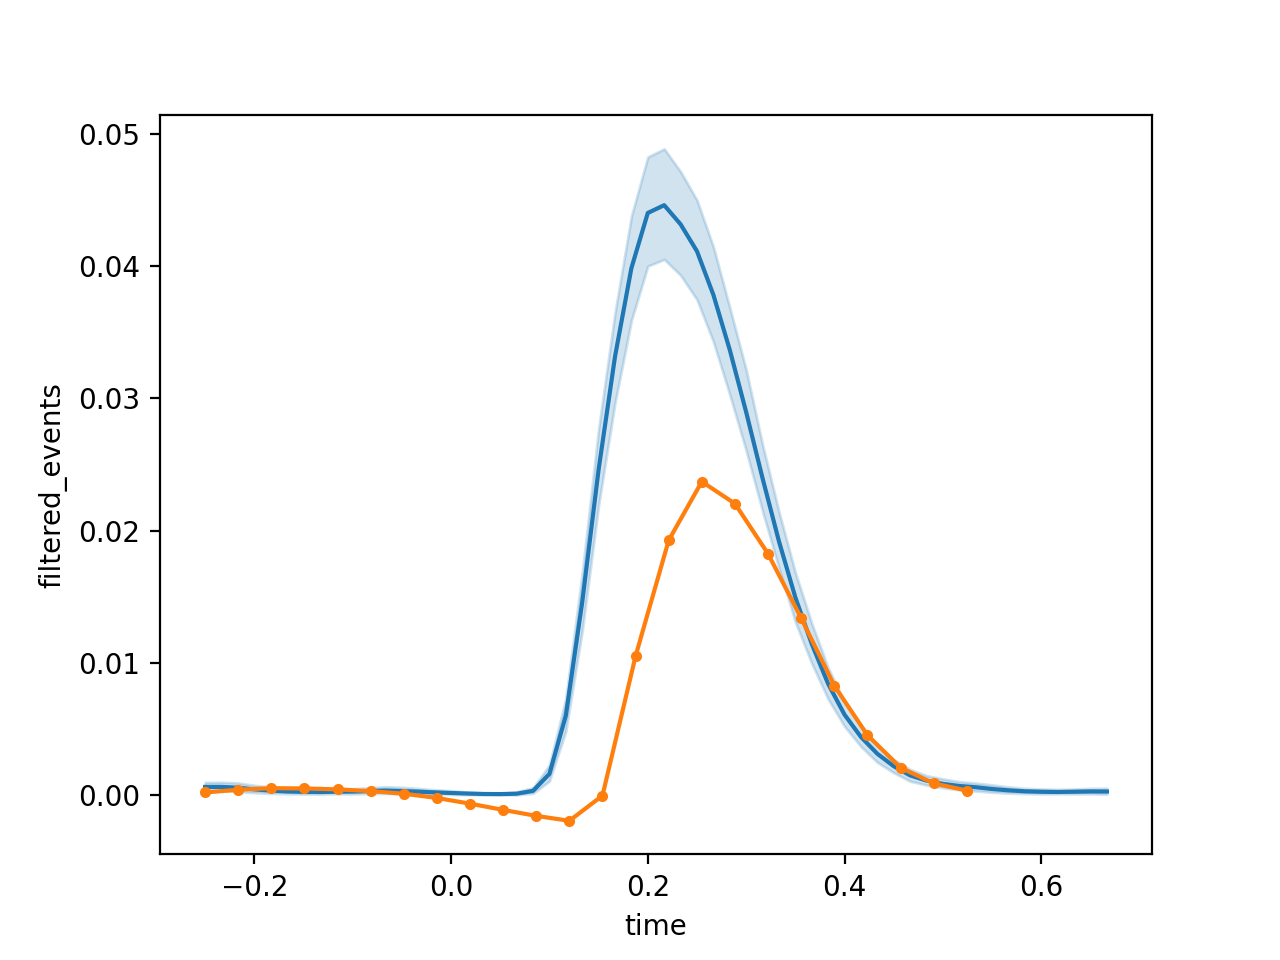

In [112]:
fig, ax = plt.subplots()
sns.lineplot(
    data = etr_scientifica,
    x = 'time',
    y = 'filtered_events',
    ax = ax
)

t_kernel, w_kernel= get_kernel_weights(models['visual'], kernel_name='image0', cell_specimen_id=csid_visual)
ax.plot(
    t_kernel,
    w_kernel,
    marker = '.'
)

# mesoscope visual

<IPython.core.display.Javascript object>


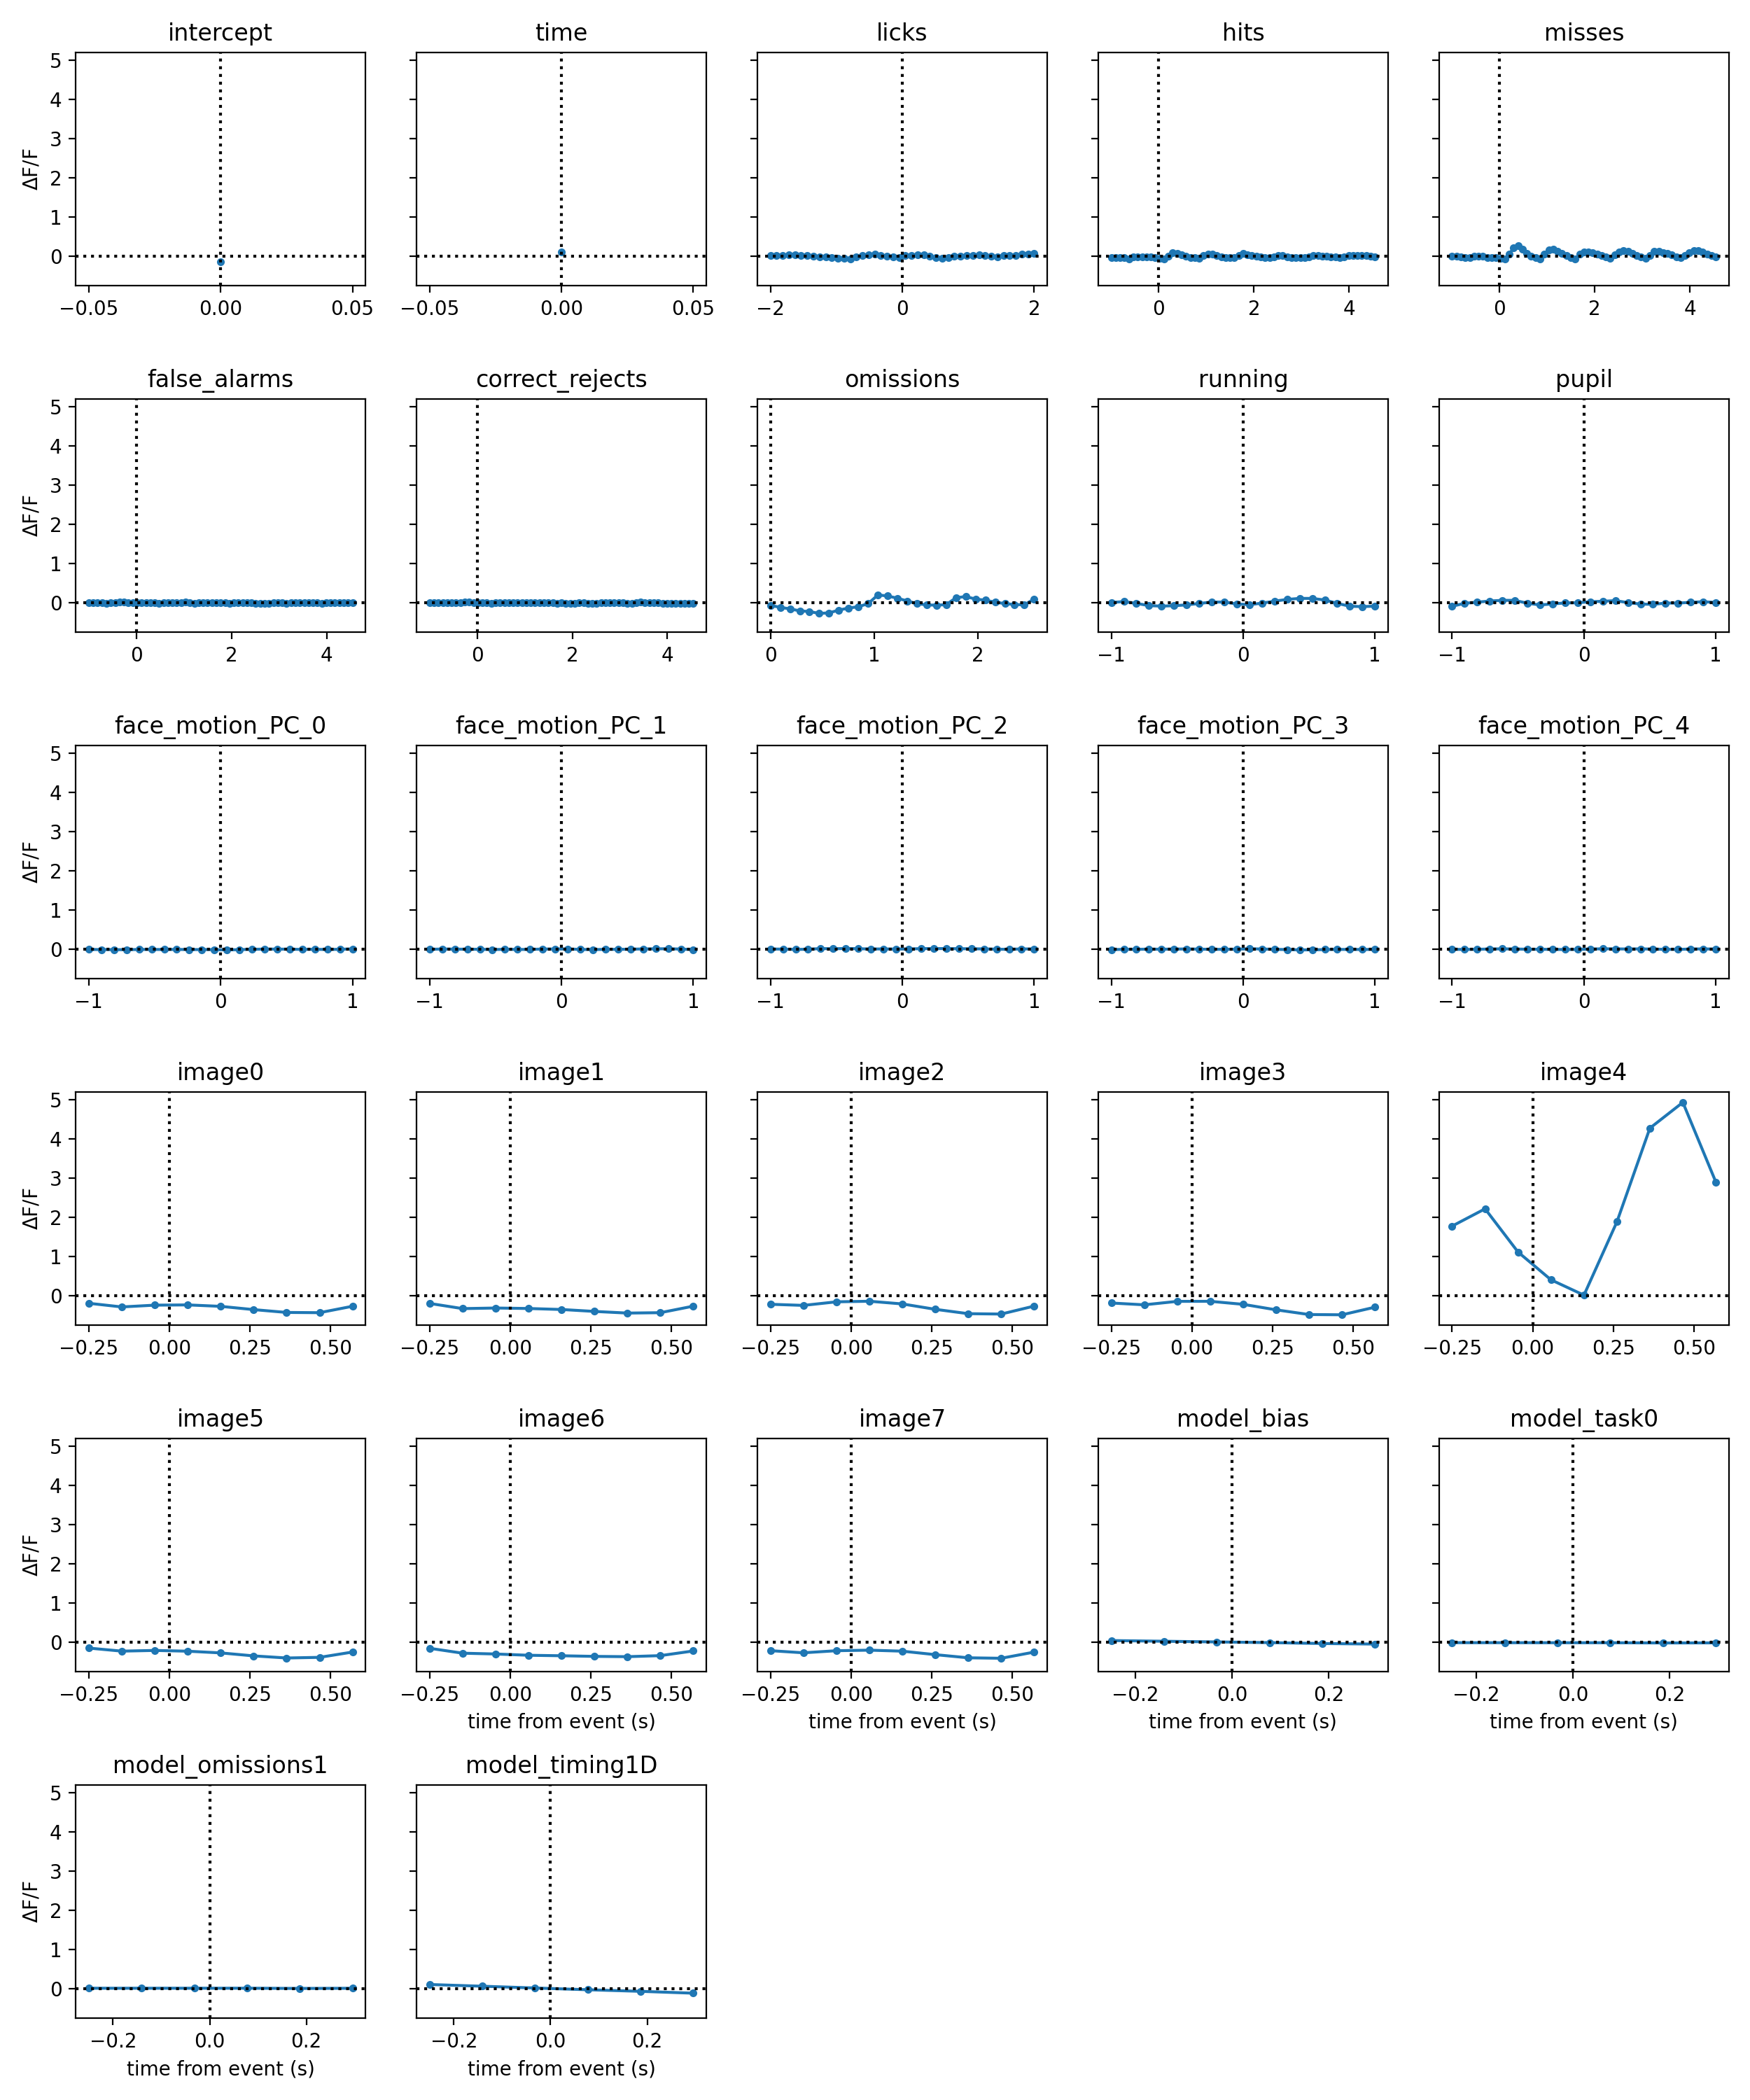

In [92]:
csid_visual_meso = 1086519680
models['visual_meso'].plot_filters(csid_visual_meso)

<IPython.core.display.Javascript object>


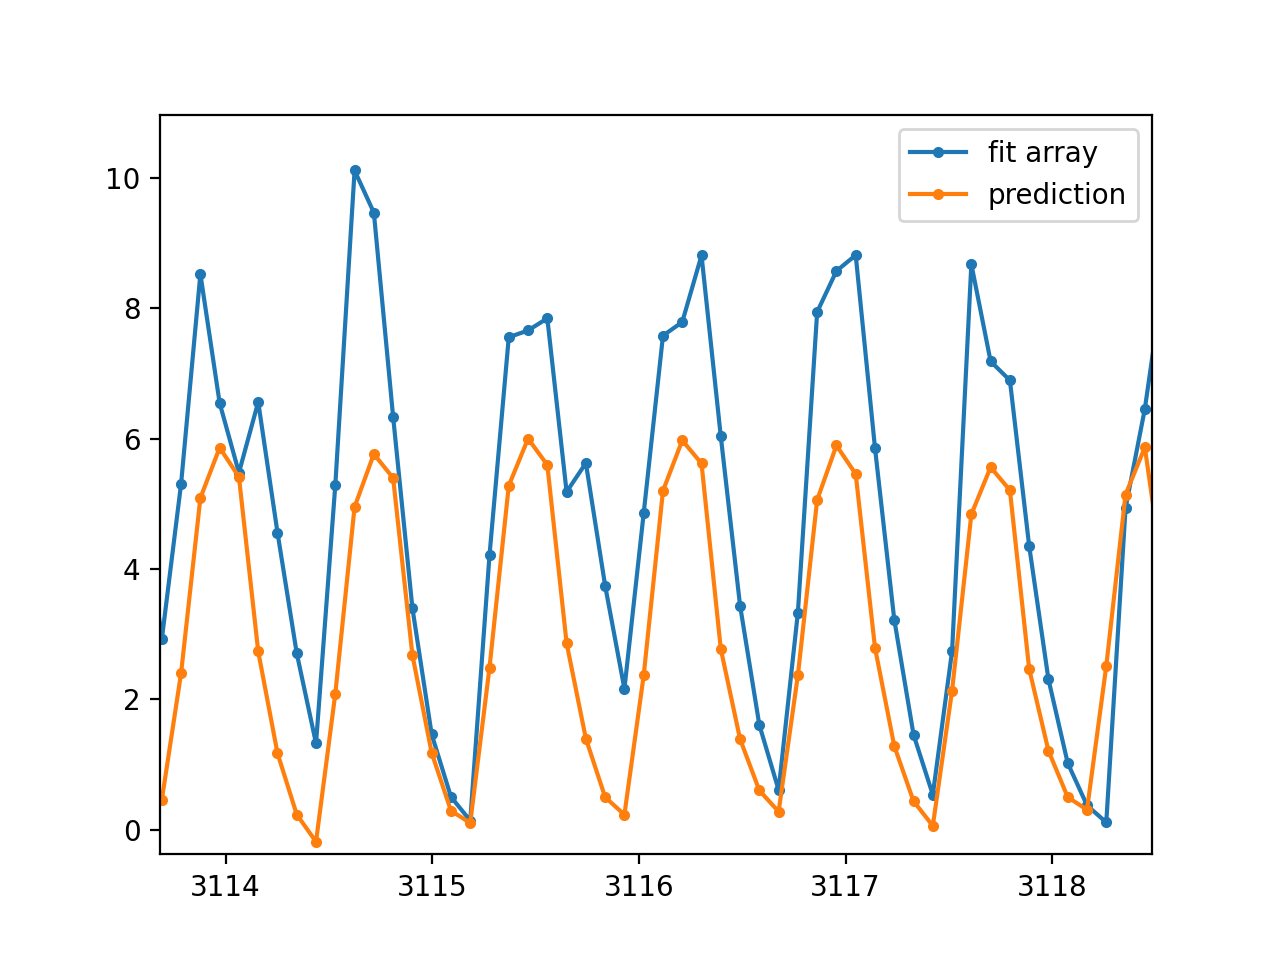

In [103]:
fig, ax = plt.subplots()
ax.plot(
    models['visual_meso'].cell_results_df.query('cell_specimen_id == @csid_visual_meso')['fit_trace_timestamps'],
    models['visual_meso'].cell_results_df.query('cell_specimen_id == @csid_visual_meso')['fit_array'],
    marker = '.'
)
ax.plot(
    models['visual_meso'].cell_results_df.query('cell_specimen_id == @csid_visual_meso')['fit_trace_timestamps'],
    models['visual_meso'].cell_results_df.query('cell_specimen_id == @csid_visual_meso')['model_prediction'],
    marker = '.'
)
ax.legend(['fit array','prediction'])

## focus on scientifica session

In [115]:
neural_data = utilities.build_tidy_cell_df(models['visual'].session)

In [119]:
stim_df = models['visual'].session.stimulus_presentations

In [121]:
etr_scientifica = vbu.event_triggered_response(
    neural_data.query('cell_specimen_id == @csid_visual'),
    parameter = 'filtered_events',
    event_times = stim_df.query('image_index == 0')['start_time'],
    t_before=0.25,
    t_after=0.67,
)
etr_scientifica

time  filtered_events event_number  event_time
0     -0.250000              0.0            0   307.48732
1     -0.233333              0.0            0   307.48732
2     -0.216667              0.0            0   307.48732
3     -0.200000              0.0            0   307.48732
4     -0.183333              0.0            0   307.48732
...         ...              ...          ...         ...
34771  0.600000              0.0          620  3887.15938
34772  0.616667              0.0          620  3887.15938
34773  0.633333              0.0          620  3887.15938
34774  0.650000              0.0          620  3887.15938
34775  0.666667              0.0          620  3887.15938

[34776 rows x 4 columns]

In [132]:

mean_response = etr_scientifica.groupby('time').mean().reset_index()

<IPython.core.display.Javascript object>


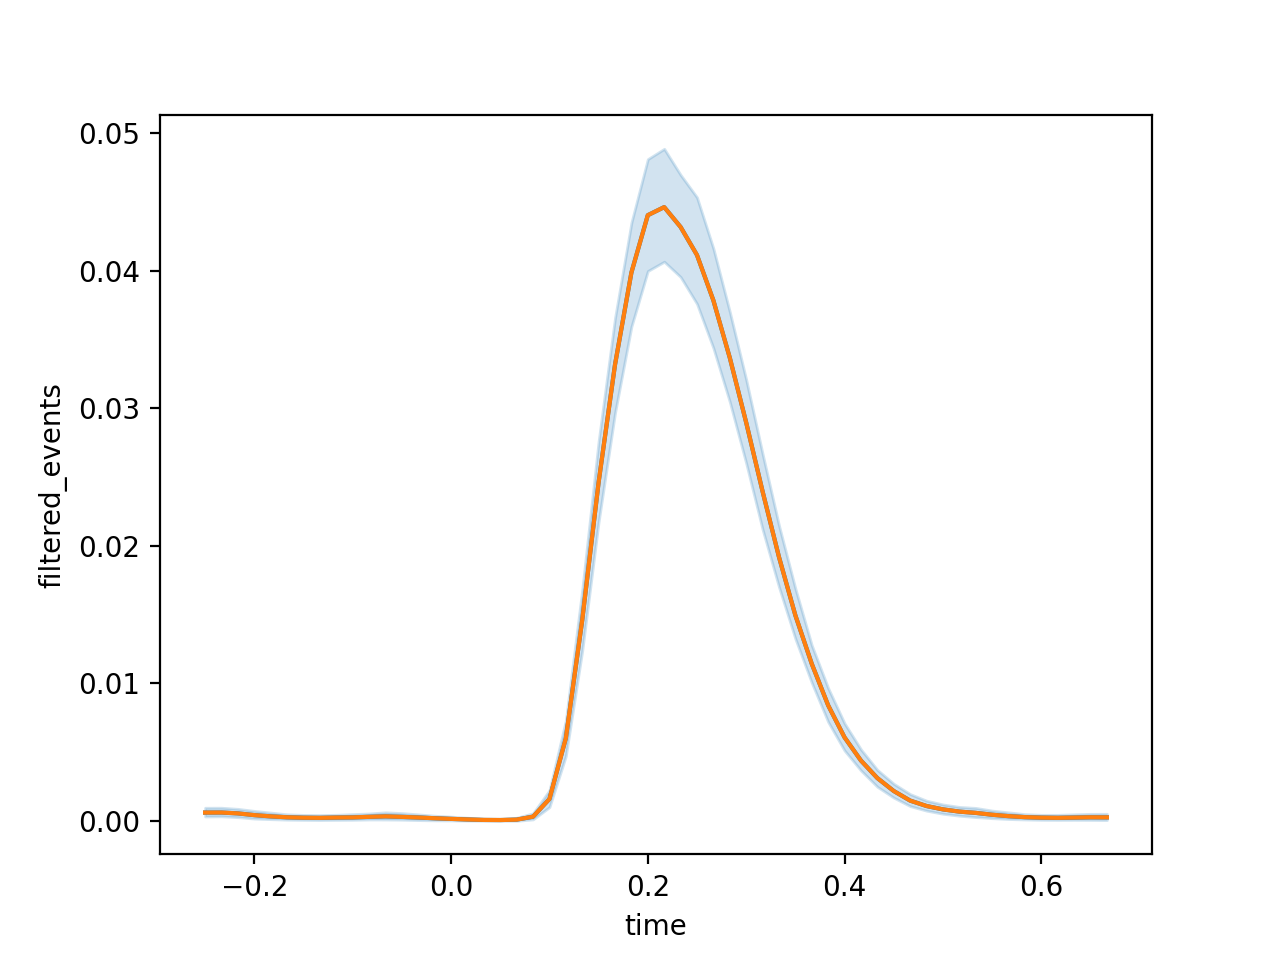

In [134]:
fig, ax = plt.subplots()
sns.lineplot(
    data = etr_scientifica,
    x = 'time',
    y = 'filtered_events',
    ax = ax
)



In [140]:
t_kernel, w_kernel= get_kernel_weights(models['visual'], kernel_name='image0', cell_specimen_id=csid_visual)

<IPython.core.display.Javascript object>


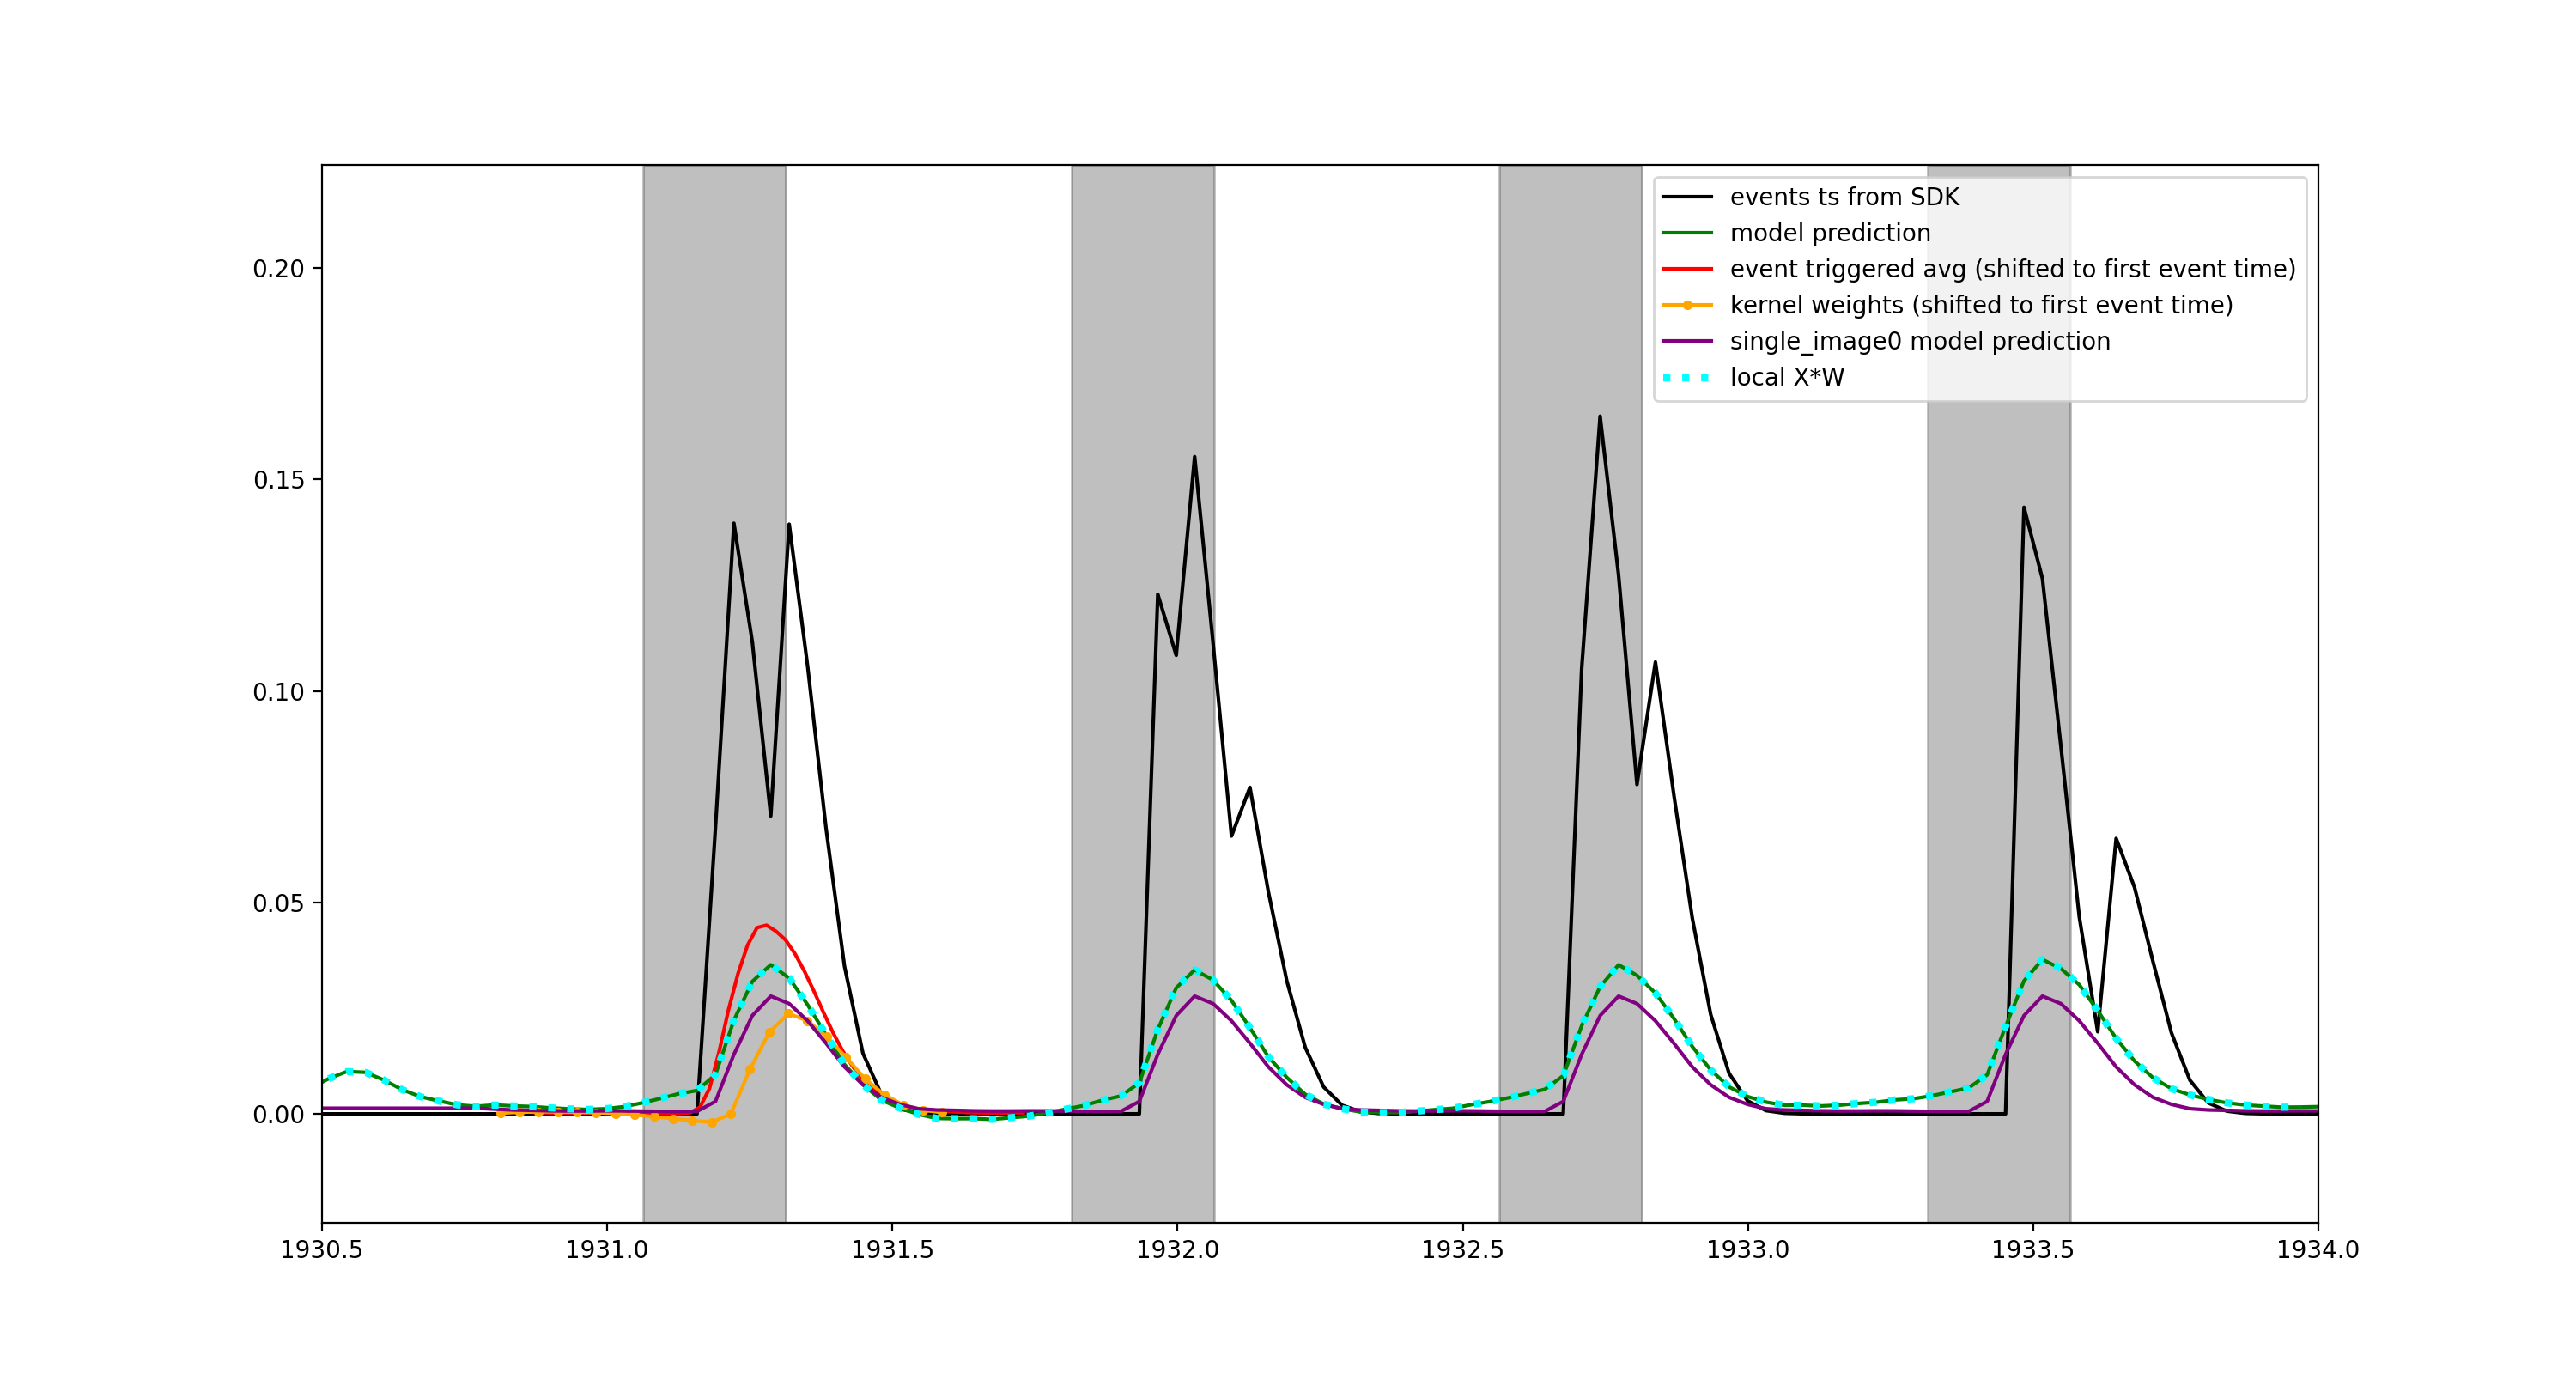

In [205]:
ti = 1930.5
tf = 1934

legend_text = []
this_cell = neural_data.query('cell_specimen_id == @csid_visual')
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(
    this_cell['timestamps'],
    this_cell['filtered_events'],
    color = 'black'
)

ax.plot(
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['model_prediction'],
    color = 'green'
)


stim_df_local = stim_df.query('start_time >= @ti and start_time < @tf and image_index == 0')

ax.set_xlim(ti, tf)

for idx, row in stim_df_local.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], color='k', alpha = 0.25)
    
for idx, row in stim_df_local.iterrows():
    ax.plot(
        mean_response['time'] + row['start_time'],
        mean_response['filtered_events'],
        color='red'
    )
    
    ax.plot(
        t_kernel + row['start_time'],
        w_kernel,
        marker = '.',
        color = 'orange'
    )
    
    break
    
cell_index = np.where(models['visual'].results.index == csid_visual)[0][0]

ax.plot(
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
    models['visual'].fit['dropouts']['single-image0']['full_model_train_prediction'][:, cell_index],
    color='purple'
)
    
    

results_df = models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual').reset_index(drop=True)
local_results_df = results_df.query('fit_trace_timestamps >= @ti and fit_trace_timestamps <= @tf')
indices = local_results_df.index.values

local_pred = np.dot(glm.X[indices,:], glm.W)[:, cell_index]

ax.plot(
    local_results_df['fit_trace_timestamps'],
    local_pred,
    color='cyan',
    linestyle = ':',
    linewidth = 3
)
    
ax.legend([
    'events ts from SDK',
    'model prediction',
    'event triggered avg (shifted to first event time)', 
    'kernel weights (shifted to first event time)',
    'single_image0 model prediction',
    'local X*W',
])




In [193]:

indices

array([50234, 50235, 50236, 50237, 50238, 50239, 50240, 50241, 50242,
       50243, 50244, 50245, 50246, 50247, 50248, 50249, 50250, 50251,
       50252, 50253, 50254, 50255, 50256, 50257, 50258, 50259, 50260,
       50261, 50262, 50263, 50264, 50265, 50266, 50267, 50268, 50269,
       50270, 50271, 50272, 50273, 50274, 50275, 50276, 50277, 50278,
       50279, 50280, 50281, 50282, 50283, 50284, 50285, 50286, 50287,
       50288, 50289, 50290, 50291, 50292, 50293, 50294, 50295, 50296,
       50297, 50298, 50299, 50300, 50301, 50302, 50303, 50304, 50305,
       50306, 50307, 50308, 50309, 50310, 50311, 50312, 50313, 50314,
       50315, 50316, 50317, 50318, 50319, 50320, 50321, 50322, 50323,
       50324, 50325, 50326, 50327, 50328, 50329, 50330, 50331, 50332,
       50333, 50334, 50335, 50336, 50337, 50338, 50339, 50340, 50341])

In [196]:
glm = models['visual']
glm.X[indices,:].shape

(108, 1097)

In [221]:
glm.X[indices,:]

<xarray.DataArray (timestamps: 108, weights: 1097)>
array([[ 1.        ,  0.45031195,  0.        , ..., -0.55663605,
        -0.55661996, -0.55660386],
       [ 1.        ,  0.45032092,  0.        , ..., -0.55665214,
        -0.55663605, -0.55661996],
       [ 1.        ,  0.45032988,  0.        , ..., -0.55666823,
        -0.55665214, -0.55663605],
       ...,
       [ 1.        ,  0.45125318,  0.        , ..., -0.55832215,
        -0.55830613, -0.5582901 ],
       [ 1.        ,  0.45126215,  0.        , ..., -0.55833817,
        -0.55832215, -0.55830613],
       [ 1.        ,  0.45127111,  0.        , ..., -0.55835419,
        -0.55833817, -0.55832215]])
Coordinates:
  * weights     (weights) <U19 'intercept_0' 'time_0' ... 'model_timing1D_7'
  * timestamps  (timestamps) float64 1.931e+03 1.931e+03 ... 1.934e+03 1.934e+03

<IPython.core.display.Javascript object>


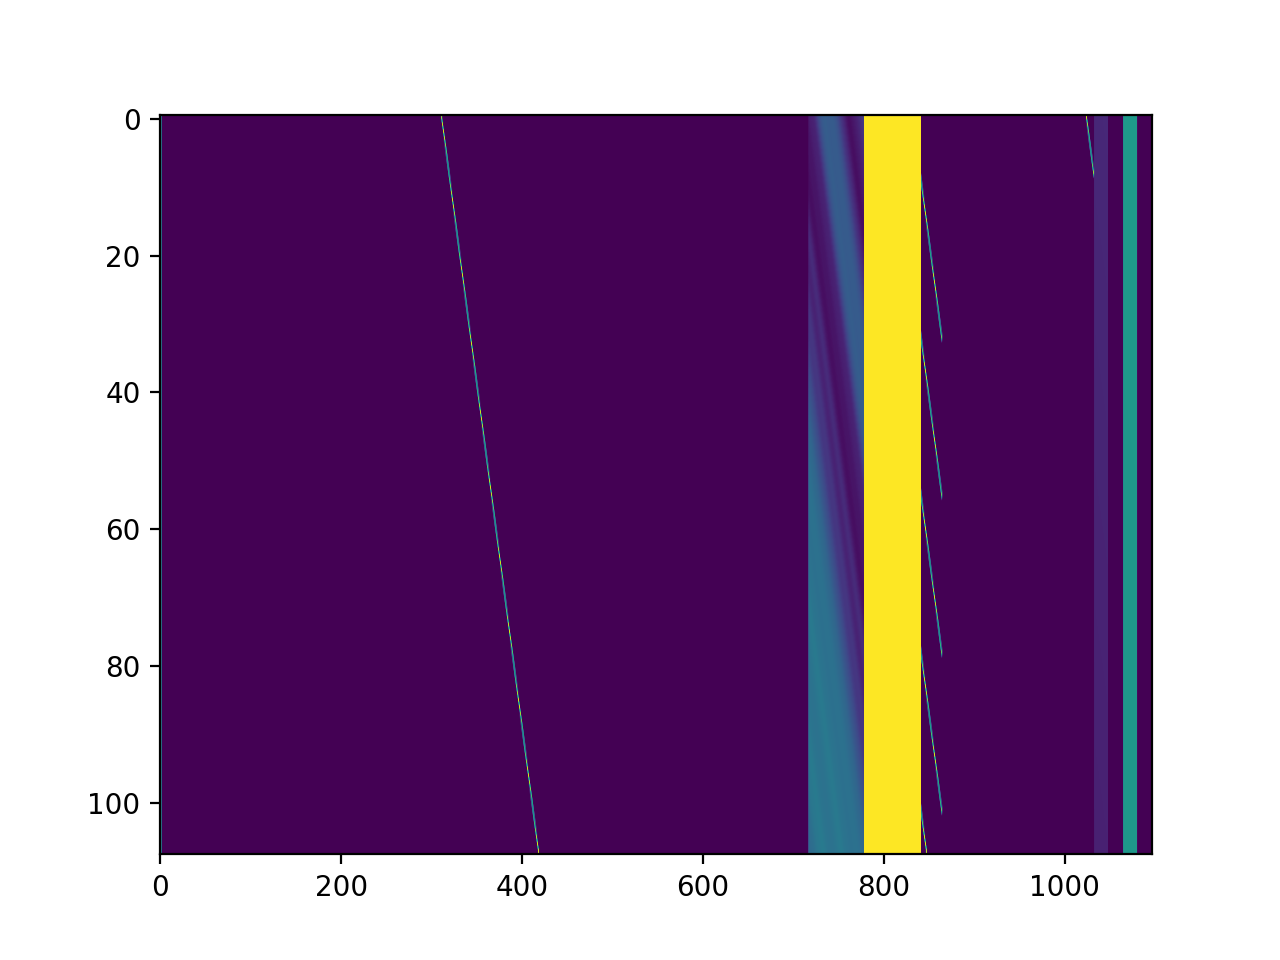

In [217]:

fig, ax = plt.subplots()
ax.imshow(glm.X[indices,:], aspect='auto', clim=[0,1])

In [233]:
glm.W['weights'].values

array(['intercept_0', 'time_0', 'licks_-62', ..., 'model_timing1D_5',
       'model_timing1D_6', 'model_timing1D_7'], dtype='<U19')

<IPython.core.display.Javascript object>


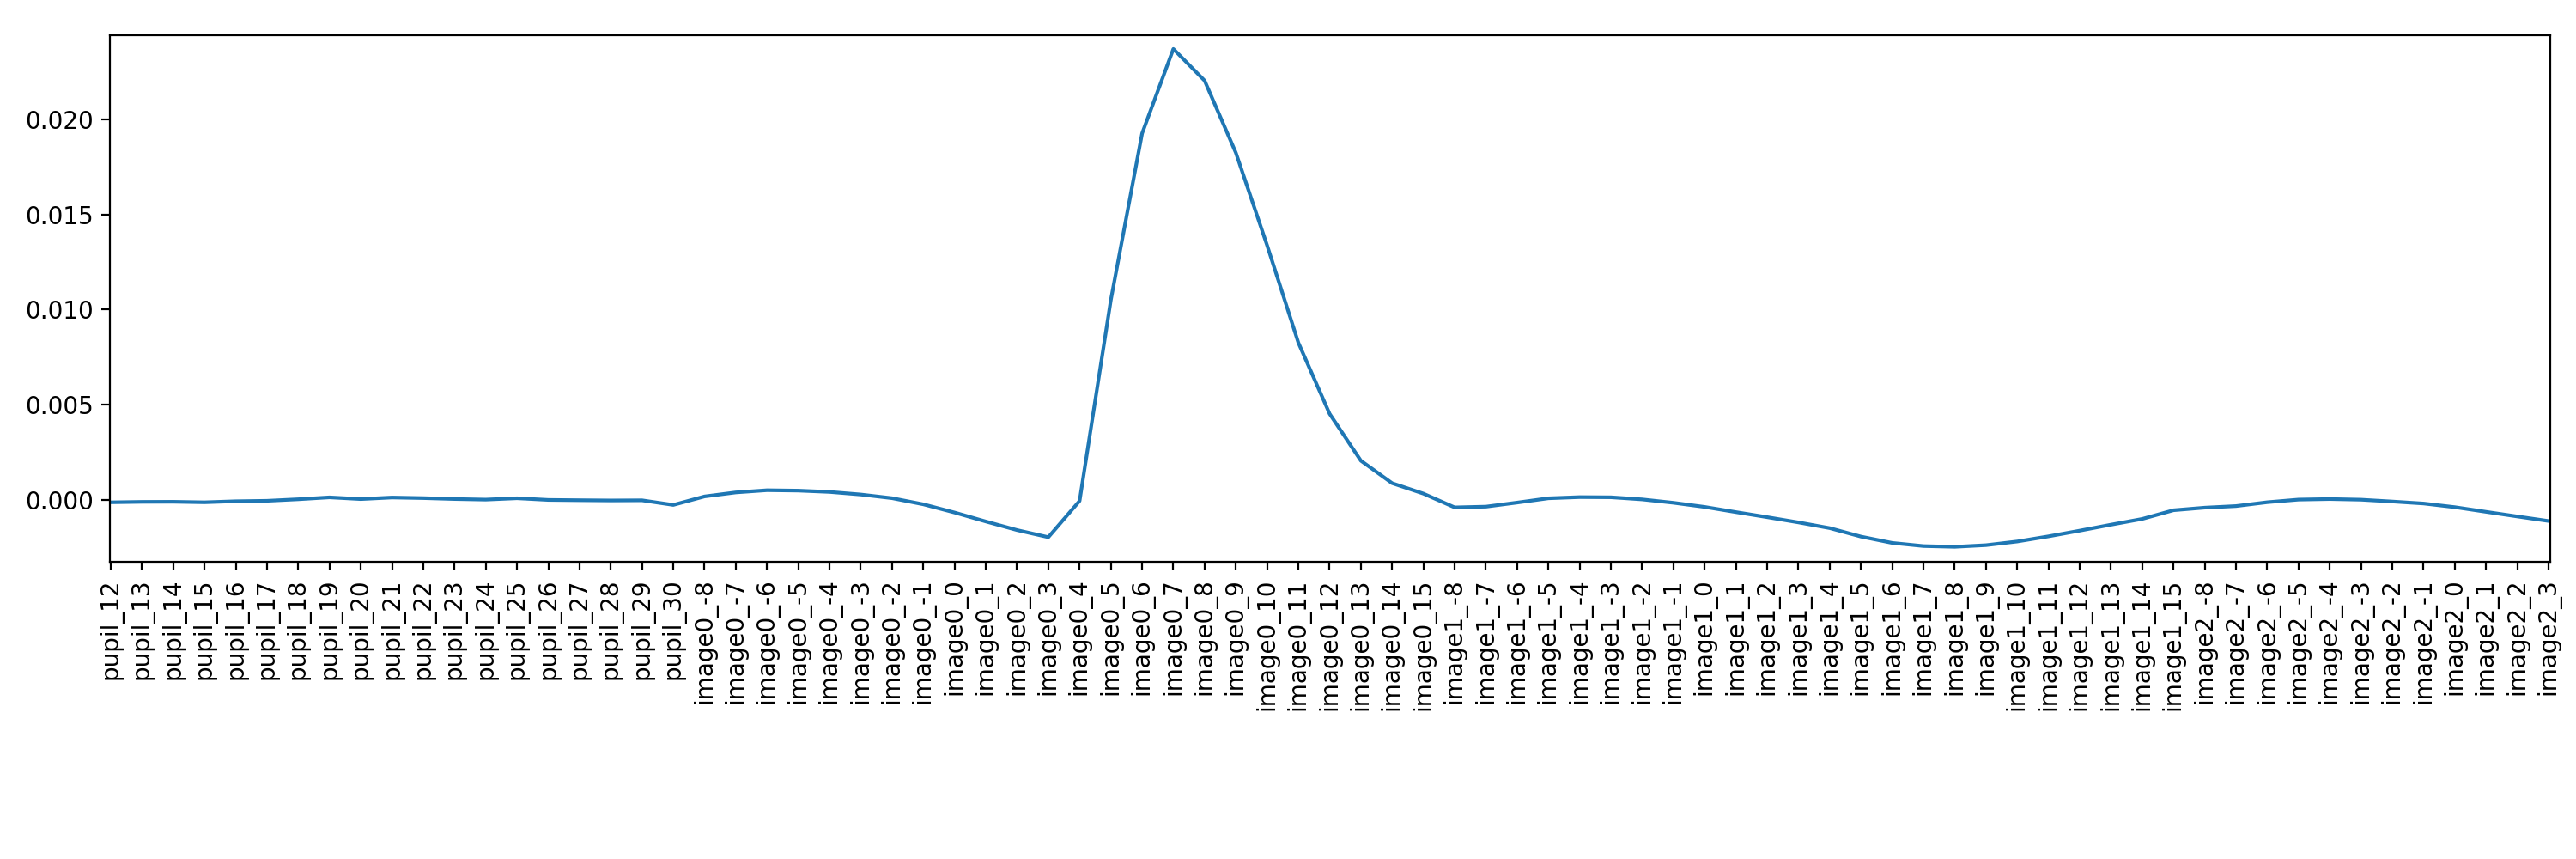

In [236]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(glm.W[:, cell_index])
ax.set_xticks(np.arange(0, np.shape(glm.W)[0]));
ax.set_xticklabels(glm.W['weights'].values, rotation=90);
fig.tight_layout()

In [277]:
image0_indices = [i for i,w in enumerate(glm.W['weights'].values) if w.startswith('image0')]

<IPython.core.display.Javascript object>


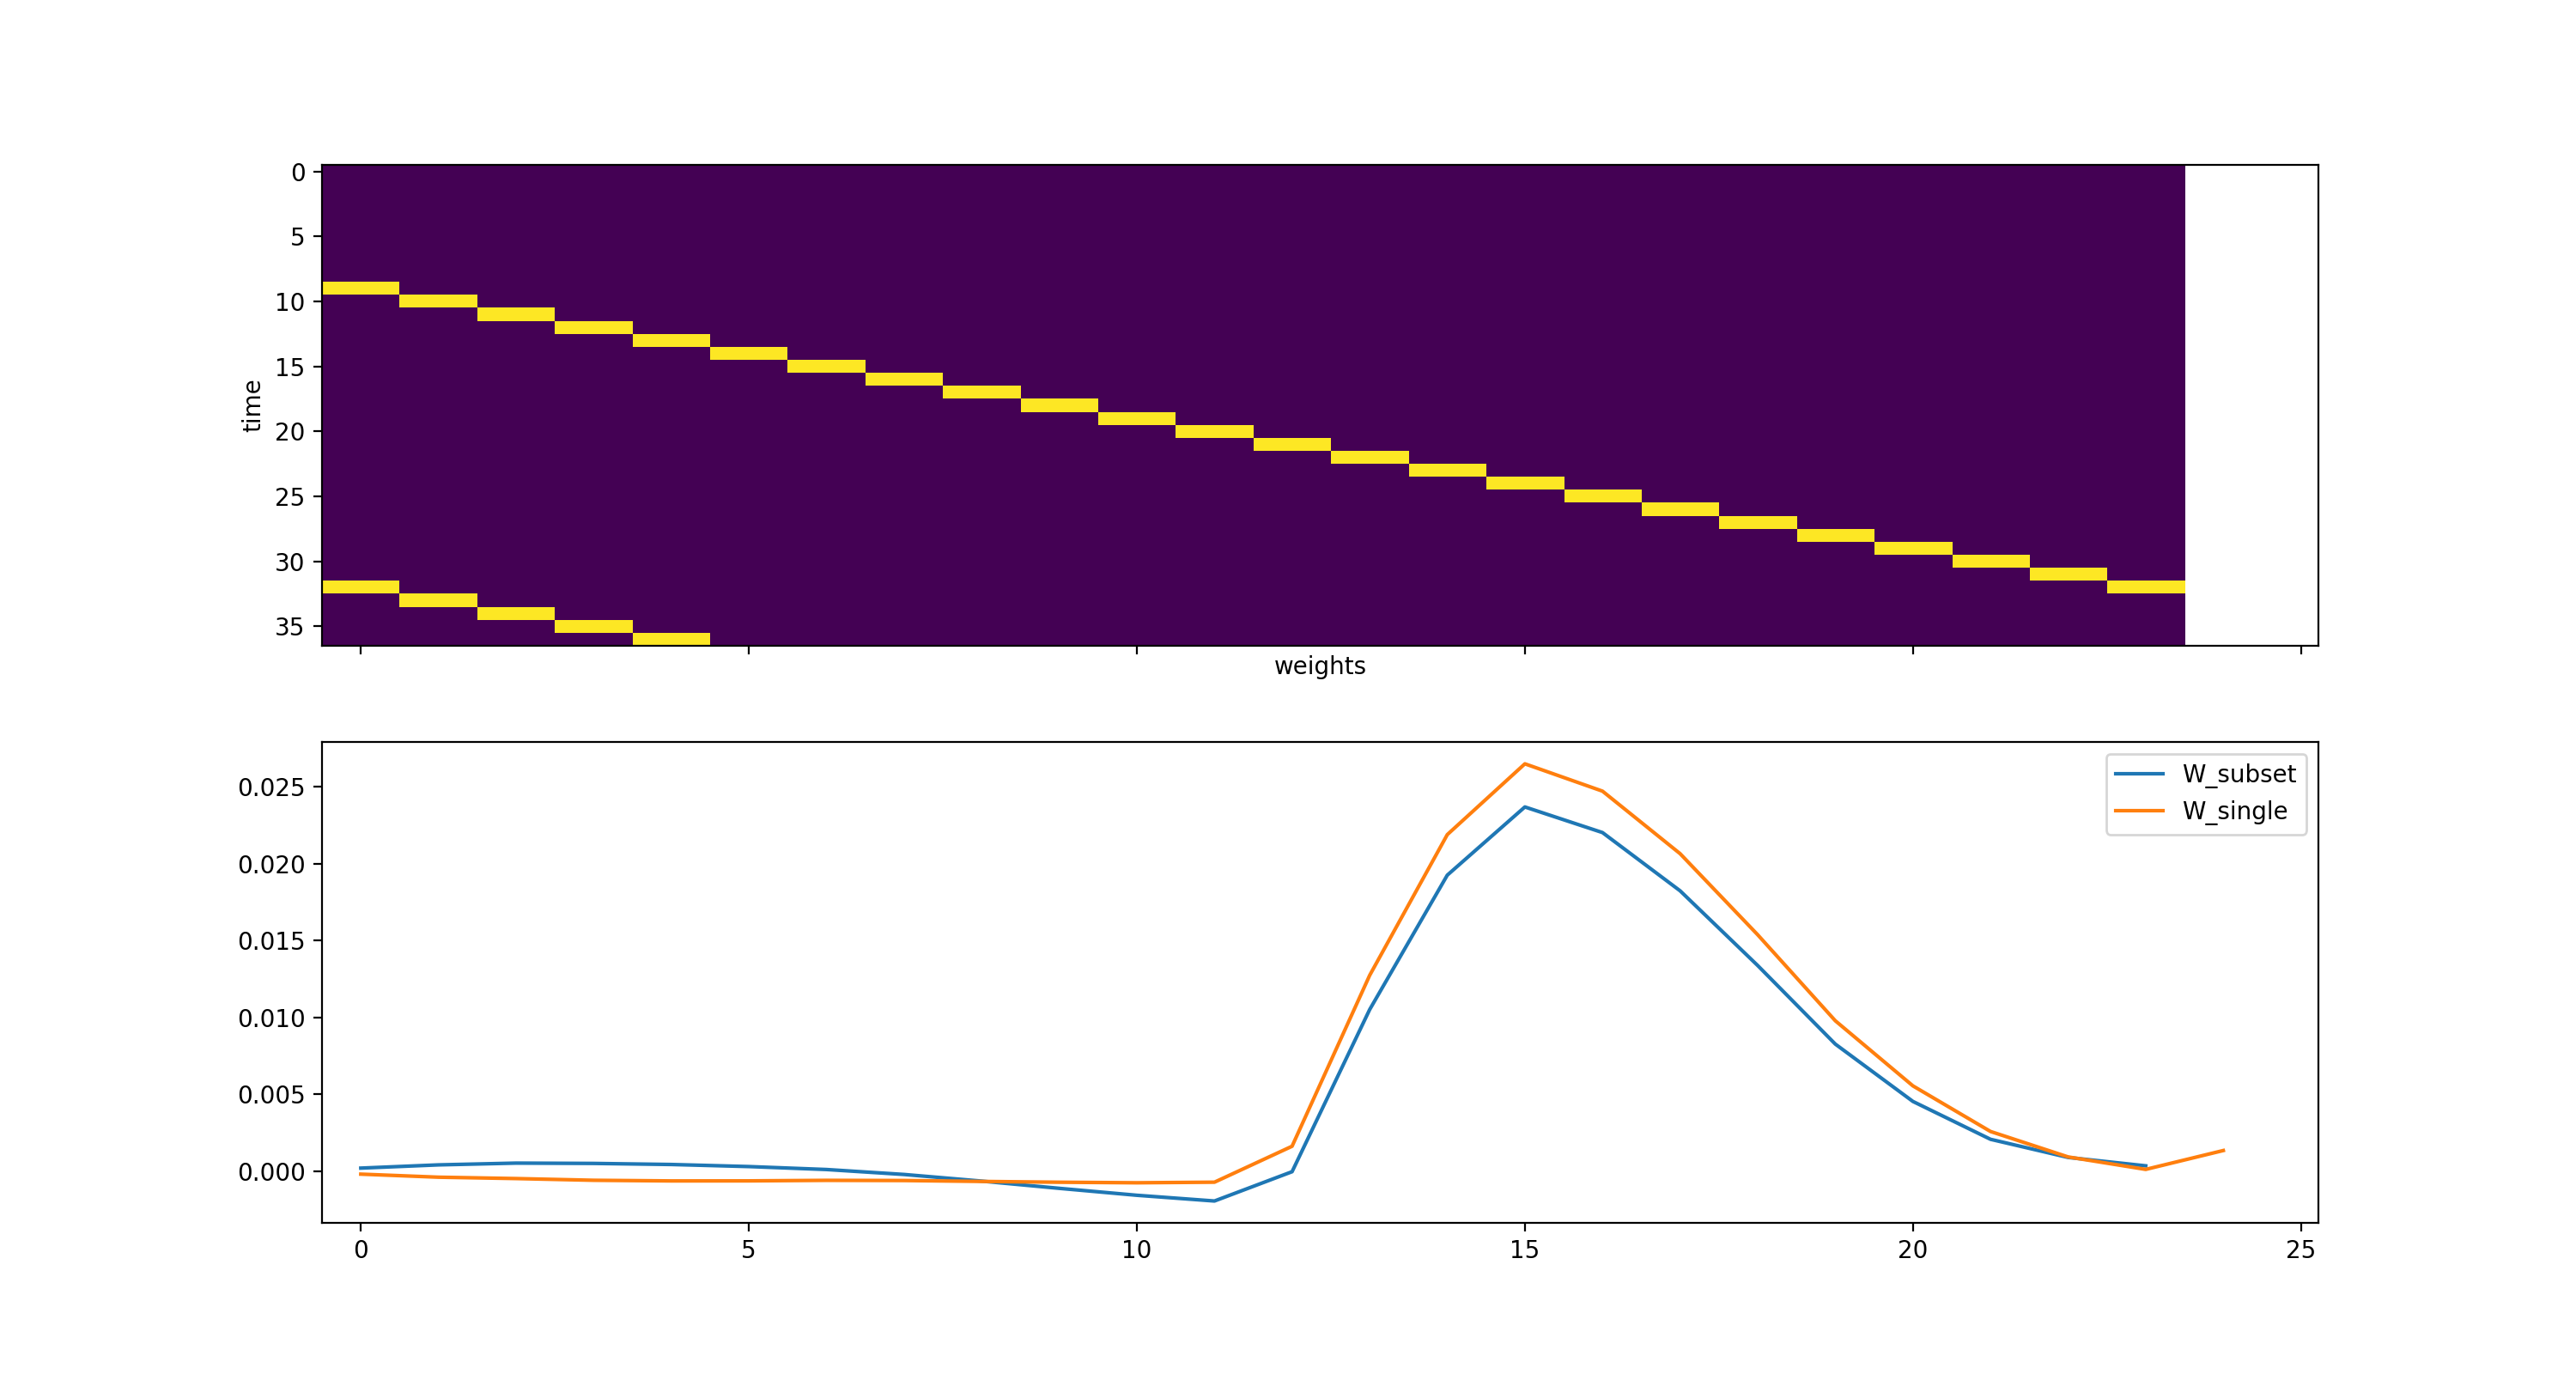

In [407]:
X_subset = glm.X[indices,image0_indices].values
W_subset = glm.W[image0_indices, cell_index].values
W_single = models['visual'].fit['dropouts']['single-image0']['train_weights'][:, cell_index]

fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
ax[0].imshow(X_subset, aspect='auto', clim=[0,1])
ax[0].set_xlabel('weights')
ax[0].set_ylabel('time')

ax[1].plot(W_subset)
ax[1].plot(W_single_subset)
ax[1].legend(['W_subset','W_single'])

In [332]:
row['start_time']-0.25

1930.81266

In [342]:
minidx = ((row['start_time']-0.25) - models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps']).abs().idxmin()
kernel_start_time = models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'][minidx]

1930.8021

In [398]:
def get_kernel_weights(glm, kernel_name, cell_specimen_id):
    
    kernel_list = list(glm.design.kernel_dict.keys())
    all_weight_names = glm.X.weights.values
    
    kernel_weight_names = [w for w in all_weight_names if w.startswith(kernel_name)]
    w_kernel = glm.W.loc[dict(weights=kernel_weight_names, cell_specimen_id=cell_specimen_id)]

    timestep = 1/glm.fit['ophys_frame_rate']
    offset_int = int(round(glm.design.kernel_dict[kernel_name]['offset_seconds']/timestep))
    t_kernel = (np.arange(len(w_kernel)) + offset_int) * timestep

    return t_kernel, w_kernel

In [404]:
t_kernel

array([-0.25806452, -0.22580645, -0.19354839, -0.16129032, -0.12903226,
       -0.09677419, -0.06451613, -0.03225806,  0.        ,  0.03225806,
        0.06451613,  0.09677419,  0.12903226,  0.16129032,  0.19354839,
        0.22580645,  0.25806452,  0.29032258,  0.32258065,  0.35483871,
        0.38709677,  0.41935484,  0.4516129 ,  0.48387097])

In [397]:
np.mean(np.diff(glm.timestamps))

0.032310537313432836

In [396]:
1/glm.fit['ophys_frame_rate']

0.03225806451612903

In [391]:
this_cell = neural_data.query('cell_specimen_id == @csid_visual').reset_index(drop=True)
this_cell['timestamps'].loc[(row['start_time'] - this_cell['timestamps']).abs().idxmin()]

1931.06058

In [390]:
row['start_time']

1931.06266

<IPython.core.display.Javascript object>


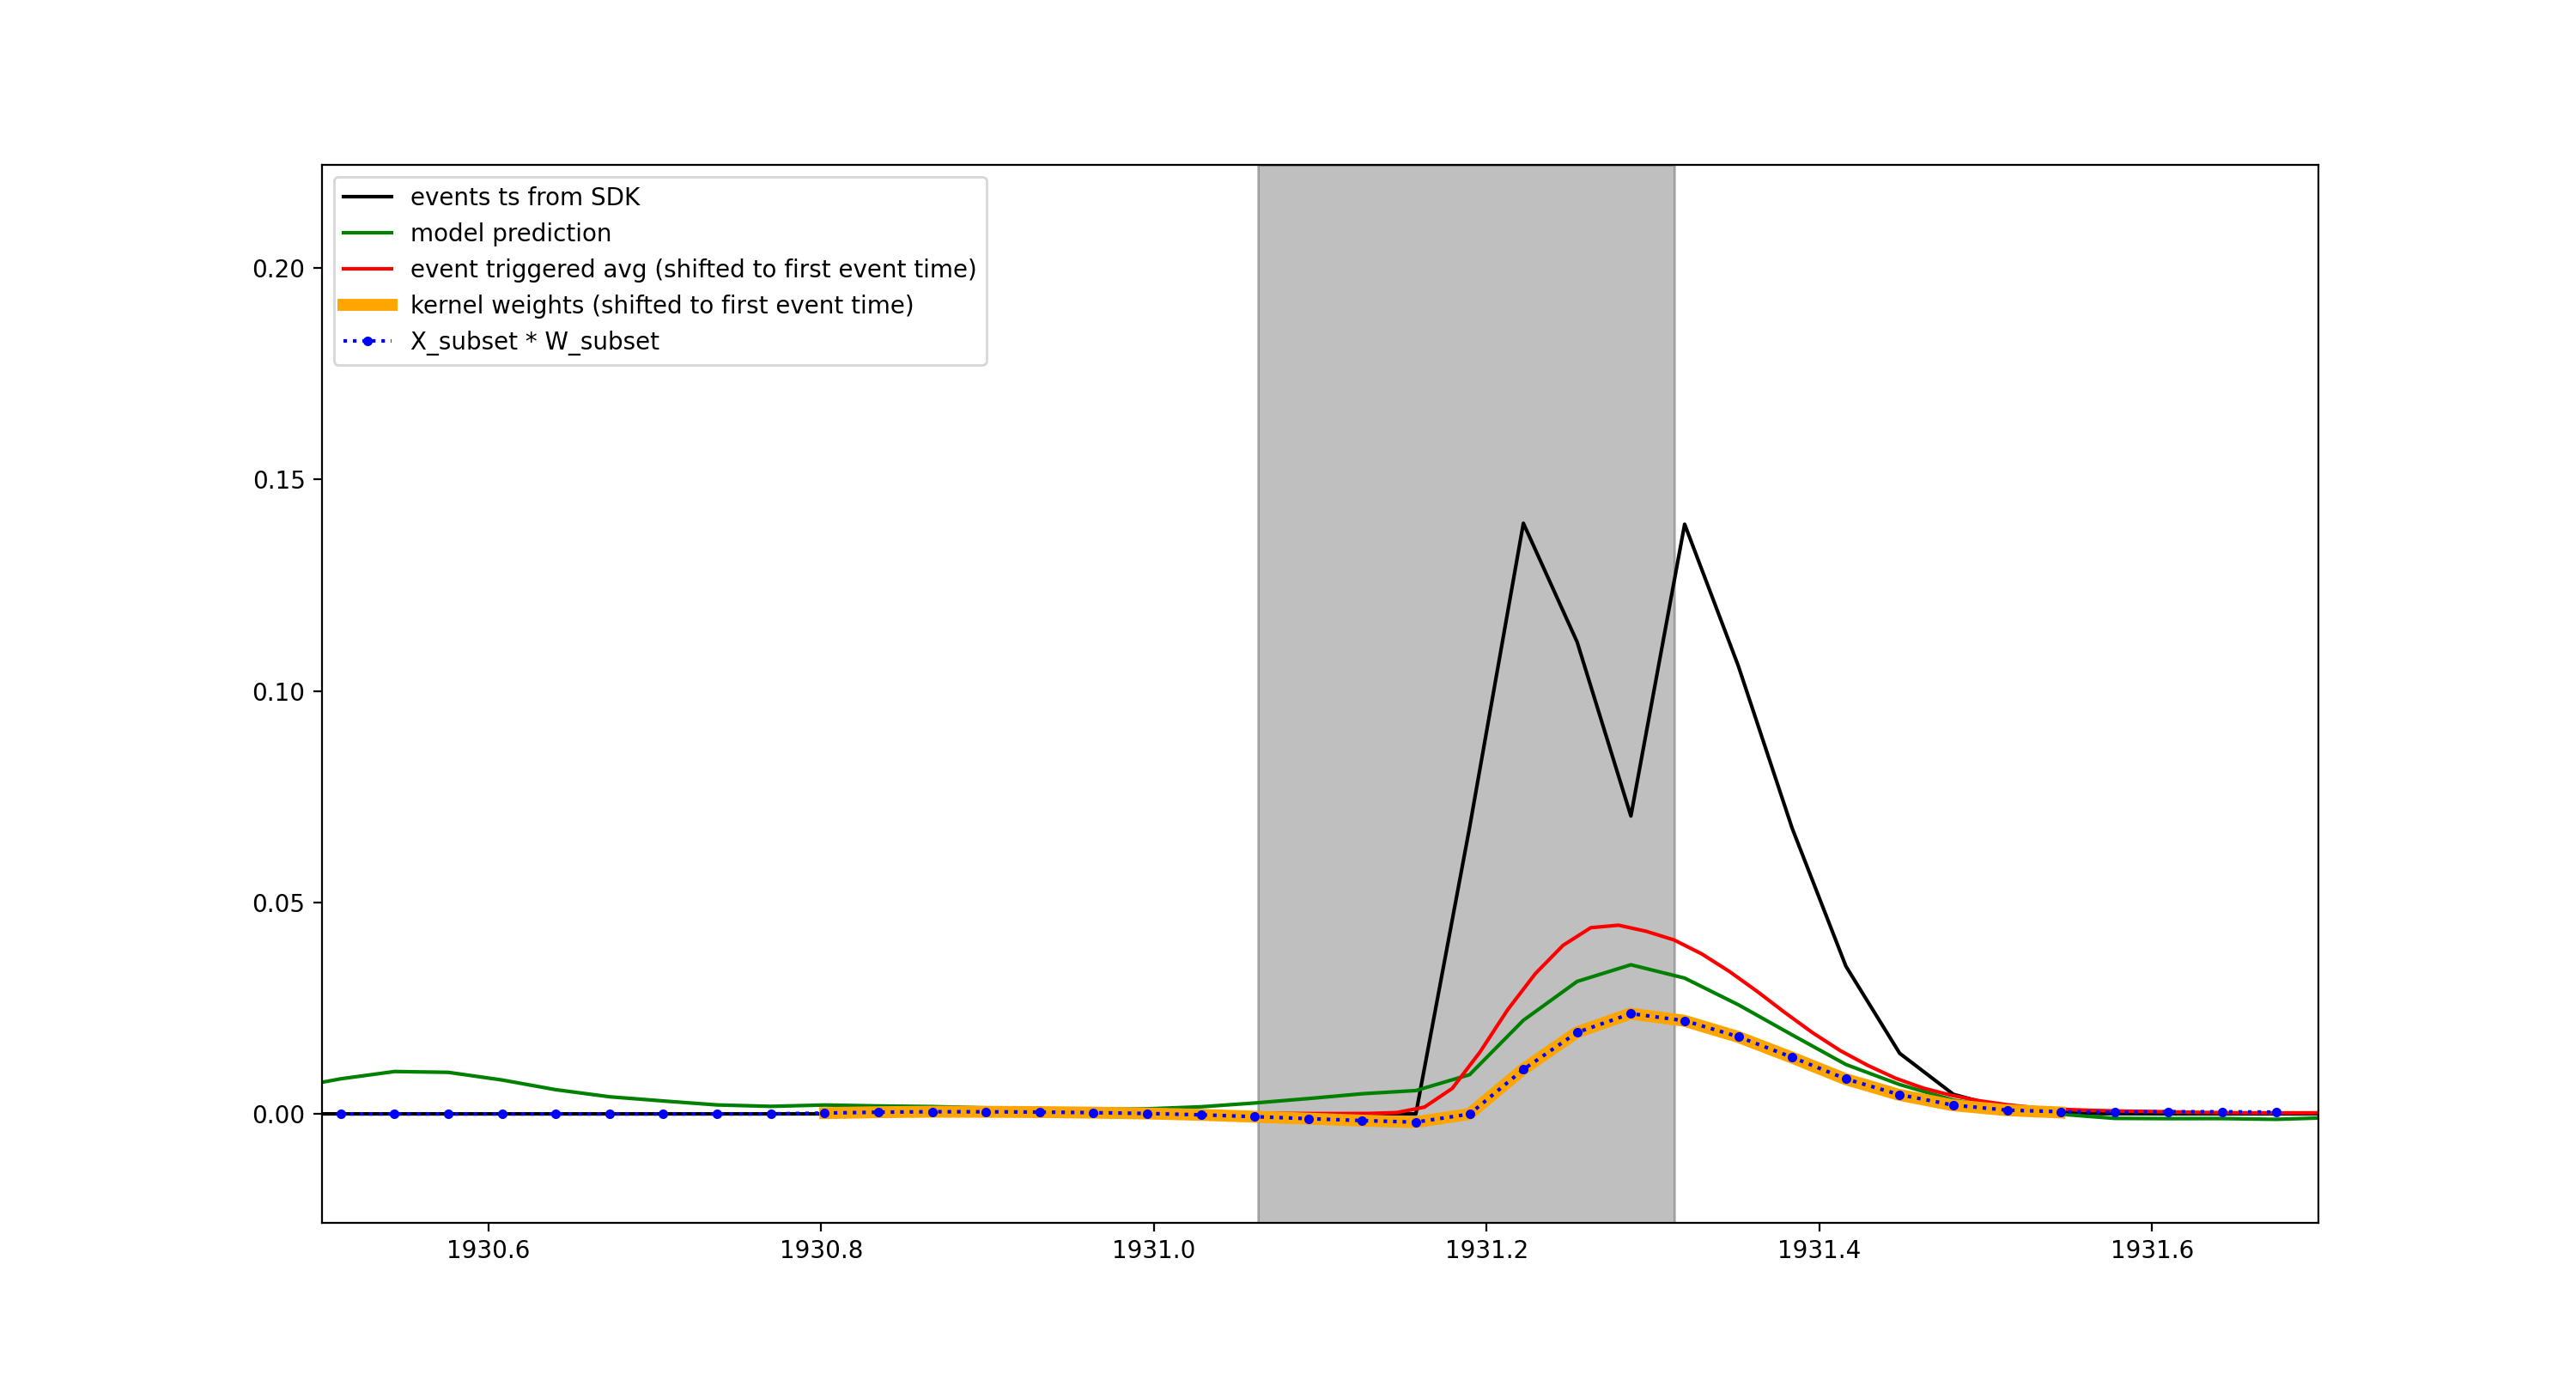

In [408]:
ti = 1930.5
tf = 1931.7

legend_text = []
this_cell = neural_data.query('cell_specimen_id == @csid_visual')
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(
    this_cell['timestamps'],
    this_cell['filtered_events'],
    color = 'black'
)

ax.plot(
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
    models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['model_prediction'],
    color = 'green'
)

t_kernel, w_kernel = get_kernel_weights(glm, kernel_name, cell_specimen_id)


stim_df_local = stim_df.query('start_time >= @ti and start_time < @tf and image_index == 0')

ax.set_xlim(ti, tf)

for idx, row in stim_df_local.iterrows():
    ax.axvspan(row['start_time'], row['stop_time'], color='k', alpha = 0.25)
    
for idx, row in stim_df_local.iterrows():
    
    ax.plot(
        mean_response['time'] + row['start_time'],
        mean_response['filtered_events'],
        color='red'
    )
    nearest_start_time = this_cell['timestamps'].loc[(row['start_time'] - this_cell['timestamps']).abs().idxmin()]
    
    ax.plot(
        t_kernel + nearest_start_time,
        w_kernel,
        marker = '.',
        color = 'orange',
        linewidth = 5,
    )
    
#     minidx = ((row['start_time']-0.25) - models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps']).abs().idxmin()
#     kernel_start_time = models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'][minidx]

#     ax.plot(
#         np.mean(np.diff(t_local))*np.arange(len(w_kernel)) + kernel_start_time,
#         w_kernel,
#         marker = '.',
#         color = 'darkorange',
#         linewidth=6
#     )
    
    break
    
# cell_index = np.where(models['visual'].results.index == csid_visual)[0][0]

# ax.plot(
#     models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps'],
#     models['visual'].fit['dropouts']['single-image0']['full_model_train_prediction'][:, cell_index],
#     color='purple'
# )
    
    

results_df = models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual').reset_index(drop=True)
local_results_df = results_df.query('fit_trace_timestamps >= @ti and fit_trace_timestamps <= @tf')
indices = local_results_df.index.values

# local_pred = np.dot(glm.X[indices,:], glm.W)[:, cell_index]

# ax.plot(
#     local_results_df['fit_trace_timestamps'],
#     local_pred,
#     color='cyan',
#     linestyle = ':',
#     linewidth = 3
# )


ax.plot(
    local_results_df['fit_trace_timestamps'],
    [np.sum([X_subset[t,i]*W_subset[i] for i in range(len(W_subset))]) for t in range(X_subset.shape[0])],
    color='blue',
    marker = '.',
    linestyle = ':'
)

# ax.plot(
#     local_results_df['fit_trace_timestamps'],
#     [np.sum([X_subset[t,i]*W_single[i] for i in range(len(W_subset))]) for t in range(X_subset.shape[0])] + W_single[24].values,
#     color='dodgerblue',
#     linestyle = ':',
#     linewidth = 3,
# )

ax.legend([
    'events ts from SDK',
    'model prediction',
    'event triggered avg (shifted to first event time)', 
    'kernel weights (shifted to first event time)',
    'X_subset * W_subset',
])


In [319]:
np.mean(np.diff(t_kernel))

0.033660589060308554

In [322]:
t_local = models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual')['fit_trace_timestamps']
np.mean(np.diff(t_local))

0.032310537313432836

In [326]:
np.mean(np.diff(t_local))*np.arange(len(w_kernel)) - 0.25

array([-0.25      , -0.21768946, -0.18537893, -0.15306839, -0.12075785,
       -0.08844731, -0.05613678, -0.02382624,  0.0084843 ,  0.04079484,
        0.07310537,  0.10541591,  0.13772645,  0.17003699,  0.20234752,
        0.23465806,  0.2669686 ,  0.29927913,  0.33158967,  0.36390021,
        0.39621075,  0.42852128,  0.46083182,  0.49314236])

In [282]:
[np.sum([X_subset[t,i]*W_subset[i] for i in range(len(W_subset))]) for t in range(X_subset.shape[0])]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000182892767962266,
 0.0003932843730539223,
 0.000508726977419995,
 0.00048819656206185744,
 0.0004187816585806324,
 0.0002836141357747794,
 9.156808715972086e-05,
 -0.00023079207125216864,
 -0.0006627423652108139,
 -0.0011343124054169203,
 -0.0015861090307938415,
 -0.0019591223009962026,
 -5.1467129459437664e-05,
 0.0105075694254734,
 0.01925983756079993,
 0.023702140836932704,
 0.022034434261428273,
 0.01824177586068302,
 0.013375647428027737,
 0.00825999001235018,
 0.00452484776248938,
 0.0020593772366842497,
 0.0008778581053986545,
 0.0005136842029797675,
 0.0003932843730539223,
 0.000508726977419995,
 0.00048819656206185744,
 0.0004187816585806324,
 0.0002836141357747794,
 9.156808715972086e-05,
 -0.00023079207125216864,
 -0.0006627423652108139,
 -0.0011343124054169203,
 -0.0015861090307938415,
 -0.0019591223009962026,
 -5.1467129459437664e-05,
 0.0105075694254734,
 0.01925983756079993,
 0.023702140836932704,
 0.022034434261

In [151]:
dir(models['visual'])

['NO_DROPOUTS',
 'TESTING',
 'W',
 'X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_import_glm_fit_tools',
 'cell_results_df',
 'collect_results',
 'current_model',
 'design',
 'df_dropout',
 'dropout_summary',
 'fit',
 'fit_model',
 'get_cells_above_threshold',
 'gft',
 'kernels',
 'load_fit_model',
 'make_movie',
 'oeid',
 'ophys_experiment_id',
 'ophys_session_id',
 'plot_dropout_summary',
 'plot_filters',
 'results',
 'run_params',
 'session',
 'timestamps',
 'version']

In [152]:
models['visual'].run_params.keys()

dict_keys(['output_dir', 'figure_dir', 'fig_coding_dir', 'fig_kernels_dir', 'fig_overfitting_dir', 'fig_clustering_dir', 'model_freeze_dir', 'experiment_output_dir', 'job_dir', 'manifest', 'json_path', 'beh_model_dir', 'version', 'creation_time', 'user', 'label', 'experiment_table_path', 'src_file', 'fit_script', 'L2_optimize_by_cell', 'L2_optimize_by_session', 'L2_use_fixed_value', 'L2_fixed_lambda', 'L2_grid_range', 'L2_grid_num', 'L2_grid_type', 'ophys_experiment_ids', 'job_settings', 'kernels', 'dropouts', 'levels', 'split_on_engagement', 'engagement_preference', 'min_engaged_duration', 'lick_bout_ILI', 'min_time_per_bout', 'min_interval', 'CV_splits', 'CV_subsplits', 'eye_blink_z', 'eye_transient_threshold', 'mean_center_inputs', 'unit_variance_inputs', 'max_run_speed', 'use_events', 'failed_kernels', 'failed_dropouts', 'kernel_error_dict'])

In [153]:
models['visual'].fit.keys()

dict_keys(['fit_trace_arr', 'dff_trace_arr', 'events_trace_arr', 'fit_trace_timestamps', 'fit_trace_bins', 'ophys_frame_rate', 'ok_to_fit_preferred_engagement', 'splits', 'ridge_splits', 'L2_grid', 'avg_regularization', 'cell_regularization', 'L2_test_cv', 'L2_train_cv', 'L2_at_grid_min', 'L2_at_grid_max', 'dropouts', 'bootstrap', 'var_shuffle_cells', 'var_shuffle_cells_threshold', 'var_shuffle_time', 'var_shuffle_time_threshold', 'failed_kernels', 'failed_dropouts'])

In [156]:
models['visual'].fit['dropouts']['single-image0'].keys()

dict_keys(['kernels', 'dropped_kernels', 'is_single', 'train_weights', 'train_variance_explained', 'train_adjvariance_explained', 'full_model_train_prediction', 'cv_weights', 'cv_var_train', 'cv_var_test', 'cv_adjvar_train', 'cv_adjvar_test', 'cv_adjvar_train_full_comparison', 'cv_adjvar_test_full_comparison'])

<IPython.core.display.Javascript object>


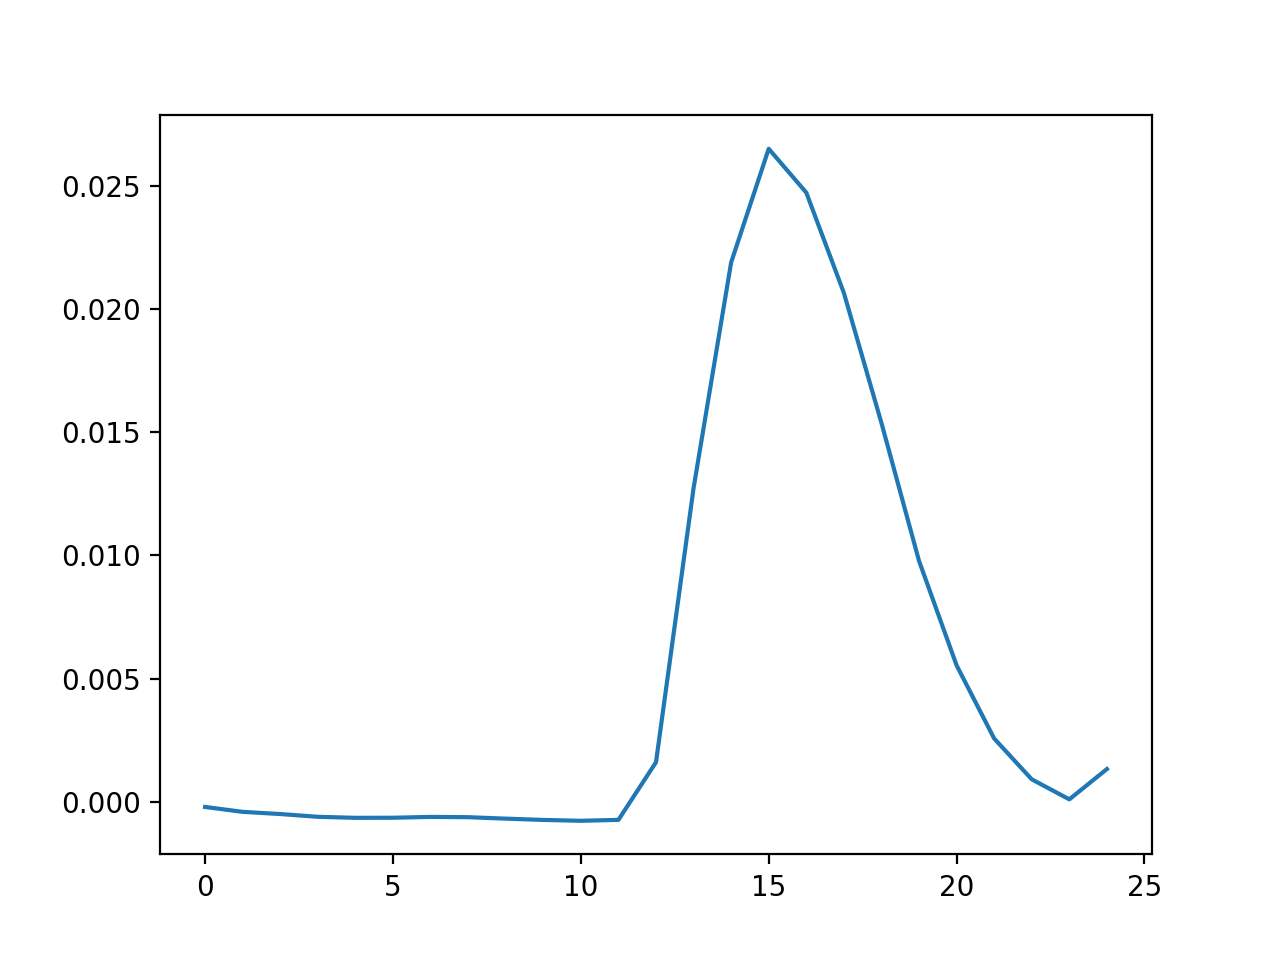

In [289]:
fig, ax = plt.subplots()
ax.plot(
    models['visual'].fit['dropouts']['single-image0']['train_weights'][:, cell_index]
)

In [166]:
models['visual'].fit['dropouts']['single-image0'].keys()

dict_keys(['kernels', 'dropped_kernels', 'is_single', 'train_weights', 'train_variance_explained', 'train_adjvariance_explained', 'full_model_train_prediction', 'cv_weights', 'cv_var_train', 'cv_var_test', 'cv_adjvar_train', 'cv_adjvar_test', 'cv_adjvar_train_full_comparison', 'cv_adjvar_test_full_comparison'])

In [160]:
np.shape(neural_data.query('cell_specimen_id == @csid_visual'))

(140080, 6)

In [167]:
len(models['visual'].session.ophys_timestamps)

140080

In [170]:
len(models['visual'].cell_results_df.query('cell_specimen_id == @csid_visual'))

111556

In [179]:
np.where(models['visual'].results.index == csid_visual)[0][0]

259